## **MODULE: MQB 7046 - MODELLING PUBLIC HEALTH DATA**

## **ASSIGNMENT: CONASS 4**

**STUDENT NAME & ID**

**1. CHONG CHEAN TAT - 22108105**

**2. AHMAD ZAKIY BIN TUMADI - 22111484**

**3. MUHAMMAD SOLIHIN BIN REZALI - 22110526**

---

**Question**
- This dataset contains records of 553 patients, encompassing a mixture of individuals diagnosed with and without liver disease. The prediction task is to determine whether a patient suffers from liver disease based on information about several biochemical markers, as well as clinical and sociodemographic profiles. The dataset comprises 12 features and 1 target variable. The details of the dataset (assignment.csv) are as follows:

| Variable Name | Description |
|---------------|-------------|
| Age           | Age |
| gender        | Gender |
| ethnic        | Patient’s ethnicity: 1-Malay, 2-Chinese, 3-Indian |
| TB            | Total Bilirubin |
| DB            | Direct Bilirubin |
| TP            | Total Proteins |
| ALB           | Albumin |
| SGPT          | Alanine Aminotransferase |
| SGOT          | Aspartate Aminotransferase |
| Alkphos       | Alkaline Phosphatase |
| AGR           | Albumin and Globulin Ratio |
| BMI           | Body mass index: 1- Overweight, 2- Normal |
| Disease       | Liver disease: 1 – Disease, 2 - non-disease |

----

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('assignment4.csv')

# Display the first few rows of the dataset
data.head()


,Patient_ID,Age,TB,DB,Alkphos,Sgot,Sgpt,TP,ALB,AGR,Disease,Ethnic,Gender,bmi
0,1,58,1.0,0.4,182,20,14,6.8,3.4,1,1,1,Male,2
1,2,46,1.8,0.7,208,14,19,7.6,4.4,1.3,1,1,Male,1
2,3,26,0.9,0.2,154,12,16,7.0,3.5,1,1,1,Female,1
3,4,29,0.9,0.3,202,11,14,6.7,3.6,1.1,1,1,Female,1
4,5,65,0.7,0.1,187,18,16,6.8,3.3,0.9,1,1,Female,1


In [2]:
# Remove the Patient_ID column
data = data.drop('Patient_ID', axis=1)

# Display the first few rows of the dataset
data.head()

,Age,TB,DB,Alkphos,Sgot,Sgpt,TP,ALB,AGR,Disease,Ethnic,Gender,bmi
0,58,1.0,0.4,182,20,14,6.8,3.4,1,1,1,Male,2
1,46,1.8,0.7,208,14,19,7.6,4.4,1.3,1,1,Male,1
2,26,0.9,0.2,154,12,16,7.0,3.5,1,1,1,Female,1
3,29,0.9,0.3,202,11,14,6.7,3.6,1.1,1,1,Female,1
4,65,0.7,0.1,187,18,16,6.8,3.3,0.9,1,1,Female,1


In [3]:
# Recode the Gender column
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Display the first few rows to confirm the changes
data.head()

,Age,TB,DB,Alkphos,Sgot,Sgpt,TP,ALB,AGR,Disease,Ethnic,Gender,bmi
0,58,1.0,0.4,182,20,14,6.8,3.4,1,1,1,0,2
1,46,1.8,0.7,208,14,19,7.6,4.4,1.3,1,1,0,1
2,26,0.9,0.2,154,12,16,7.0,3.5,1,1,1,1,1
3,29,0.9,0.3,202,11,14,6.7,3.6,1.1,1,1,1,1
4,65,0.7,0.1,187,18,16,6.8,3.3,0.9,1,1,1,1


In [4]:
# Check the data types of the columns to identify any potential issues
data.dtypes


Age          int64
TB         float64
DB         float64
Alkphos      int64
Sgot         int64
Sgpt         int64
TP         float64
ALB        float64
AGR         object
Disease      int64
Ethnic       int64
Gender       int64
bmi          int64
dtype: object

In [5]:
# Convert AGR column to numeric, coercing errors to NaN
data['AGR'] = pd.to_numeric(data['AGR'], errors='coerce')

# Check the data types again to confirm the change
data.dtypes

Age          int64
TB         float64
DB         float64
Alkphos      int64
Sgot         int64
Sgpt         int64
TP         float64
ALB        float64
AGR        float64
Disease      int64
Ethnic       int64
Gender       int64
bmi          int64
dtype: object

**Missing Data**

In [6]:
# Check for missing data in the dataset
missing_data = data.isnull().sum()
missing_data

Age        0
TB         0
DB         0
Alkphos    0
Sgot       0
Sgpt       0
TP         0
ALB        0
AGR        4
Disease    0
Ethnic     0
Gender     0
bmi        0
dtype: int64

In [7]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Check the shape of the data to confirm rows are dropped
data_cleaned.shape


(549, 13)

**Outlier**

In [8]:
import numpy as np

# Function to identify outliers based on IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of numerical columns
numerical_columns = ['Age', 'TB', 'DB', 'Alkphos', 'Sgot', 'Sgpt', 'TP', 'ALB', 'AGR']

# Dictionary to store outliers for each column
outliers_dict = {}

# Identify outliers for each numerical column
for column in numerical_columns:
    outliers_dict[column] = identify_outliers(data_cleaned, column)

# Display the number of outliers in each column
outliers_summary = {column: len(outliers) for column, outliers in outliers_dict.items()}
outliers_summary


{'Age': 0,
 'TB': 78,
 'DB': 78,
 'Alkphos': 61,
 'Sgot': 64,
 'Sgpt': 70,
 'TP': 7,
 'ALB': 0,
 'AGR': 10}

In [9]:
import pandas as pd
from tabulate import tabulate

# Function to cap outliers based on IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Explicitly cast to compatible dtype
    lower_bound = lower_bound.astype(df[column].dtype)
    upper_bound = upper_bound.astype(df[column].dtype)
    
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df

# List of numerical columns
numerical_columns = ['Age', 'TB', 'DB', 'Alkphos', 'Sgot', 'Sgpt', 'TP', 'ALB', 'AGR']

# Cap outliers for each numerical column
for column in numerical_columns:
    data_cleaned = cap_outliers(data_cleaned, column)

# Calculate the descriptive statistics
stats = data_cleaned.describe()

# Round the statistics to 2 decimal places
stats_rounded = stats.round(2)

# Display the statistics in a tabular format
stats_table = pd.DataFrame(stats_rounded)

# Use tabulate to print the table
print(tabulate(stats_table, headers='keys', tablefmt='pretty'))


+-------+-------+-------+-------+---------+-------+-------+-------+-------+-------+---------+--------+--------+-------+
|       |  Age  |  TB   |  DB   | Alkphos | Sgot  | Sgpt  |  TP   |  ALB  |  AGR  | Disease | Ethnic | Gender |  bmi  |
+-------+-------+-------+-------+---------+-------+-------+-------+-------+-------+---------+--------+--------+-------+
| count | 549.0 | 549.0 | 549.0 |  549.0  | 549.0 | 549.0 | 549.0 | 549.0 | 549.0 |  549.0  | 549.0  | 549.0  | 549.0 |
| mean  | 44.46 | 1.91  | 0.84  | 248.92  | 65.16 | 47.56 | 6.48  | 3.14  | 0.95  |  1.31   |  1.76  |  0.25  | 1.36  |
|  std  | 16.04 | 1.65  | 0.92  |  108.9  | 54.07 | 32.79 | 1.06  | 0.79  |  0.3  |  0.46   |  0.83  |  0.43  | 0.48  |
|  min  |  4.0  |  0.4  |  0.1  |  63.0   | 10.0  | 10.0  |  3.7  |  0.9  |  0.3  |   1.0   |  1.0   |  0.0   |  1.0  |
|  25%  | 33.0  |  0.8  |  0.2  |  175.0  | 25.0  | 23.0  |  5.8  |  2.6  |  0.7  |   1.0   |  1.0   |  0.0   |  1.0  |
|  50%  | 45.0  |  1.0  |  0.3  |  206.0

In [10]:
import pandas as pd
from tabulate import tabulate

# Define the categorical columns and their mappings
categorical_columns = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnic': {1: 'Malay', 2: 'Chinese', 3: 'Indian'},
    'bmi': {1: 'Overweight', 2: 'Normal'},
    'Disease': {1: 'Disease', 2: 'Non-disease'}
}

# Function to generate descriptive statistics for categorical columns
def descriptive_stats_categorical(df, columns):
    stats = {}
    for column, mapping in columns.items():
        df_copy = df.copy()  # Create a copy of the DataFrame
        df_copy[column] = df_copy[column].map(mapping)
        count = df_copy[column].value_counts()
        percentage = (count / len(df_copy[column])) * 100
        stats[column] = pd.concat([count, percentage], axis=1, keys=['Count', 'Percentage'])
    return stats

# Generate and display descriptive statistics for the categorical columns
categorical_stats = descriptive_stats_categorical(data_cleaned, categorical_columns)
for column, stats in categorical_stats.items():
    print(f"Descriptive statistics for {column}:")
    print(tabulate(stats, headers='keys', tablefmt='grid'))
    print()


Descriptive statistics for Gender:
+----------+---------+--------------+
| Gender   |   Count |   Percentage |
+==========+=========+==============+
| Male     |     414 |      75.4098 |
+----------+---------+--------------+
| Female   |     135 |      24.5902 |
+----------+---------+--------------+

Descriptive statistics for Ethnic:
+----------+---------+--------------+
| Ethnic   |   Count |   Percentage |
+==========+=========+==============+
| Malay    |     272 |      49.5446 |
+----------+---------+--------------+
| Chinese  |     139 |      25.3188 |
+----------+---------+--------------+
| Indian   |     138 |      25.1366 |
+----------+---------+--------------+

Descriptive statistics for bmi:
+------------+---------+--------------+
| bmi        |   Count |   Percentage |
+============+=========+==============+
| Overweight |     352 |      64.1166 |
+------------+---------+--------------+
| Normal     |     197 |      35.8834 |
+------------+---------+--------------+

Descrip

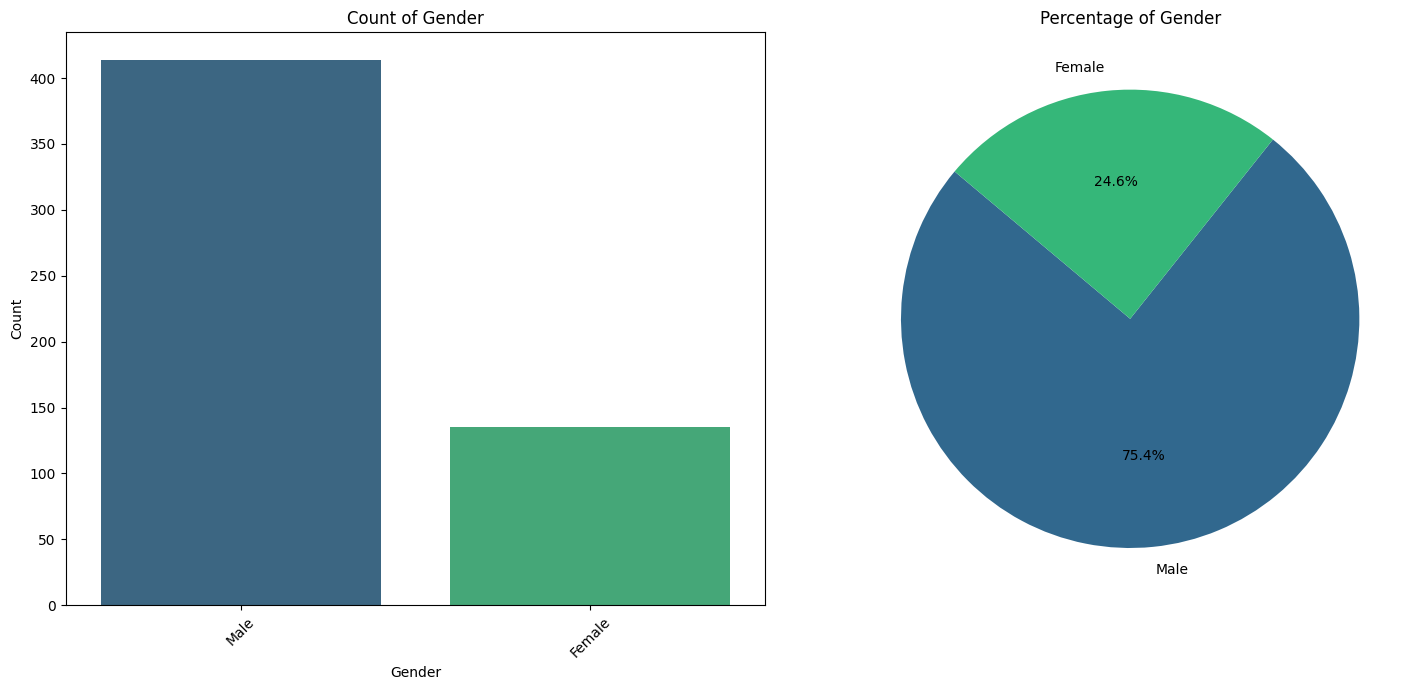

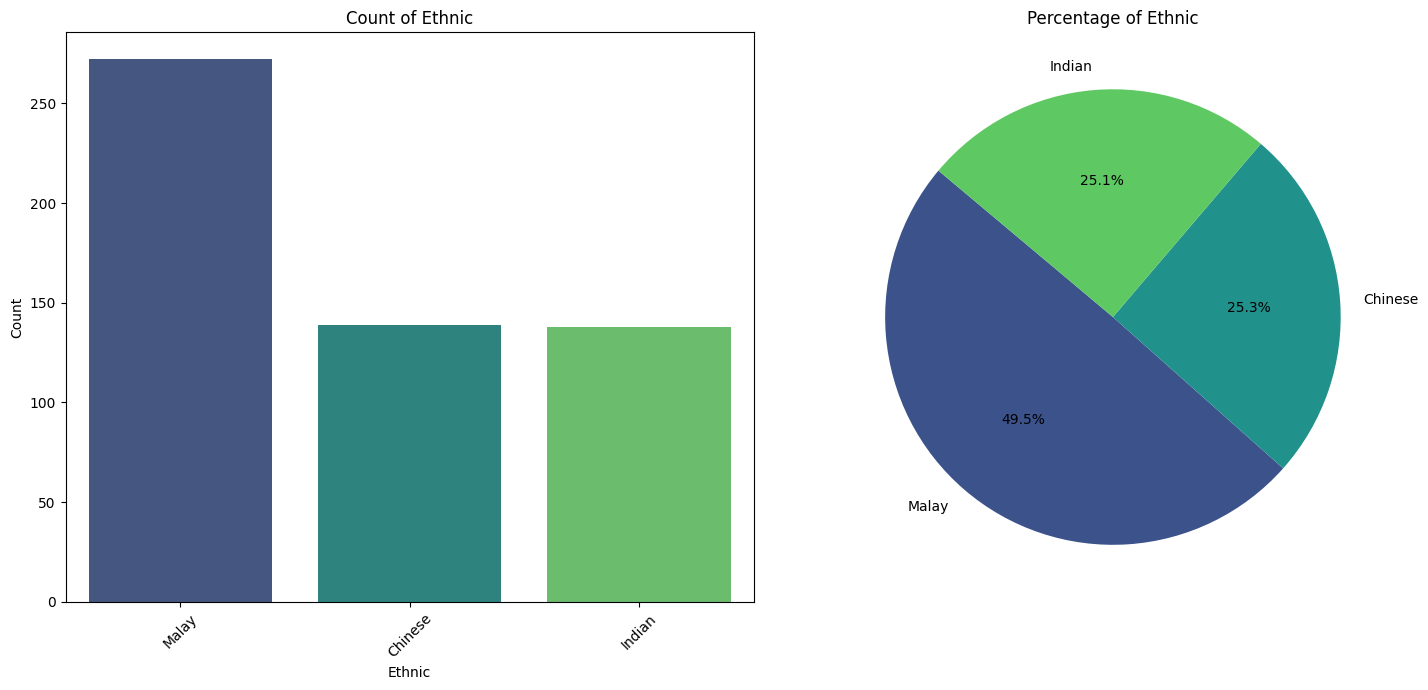

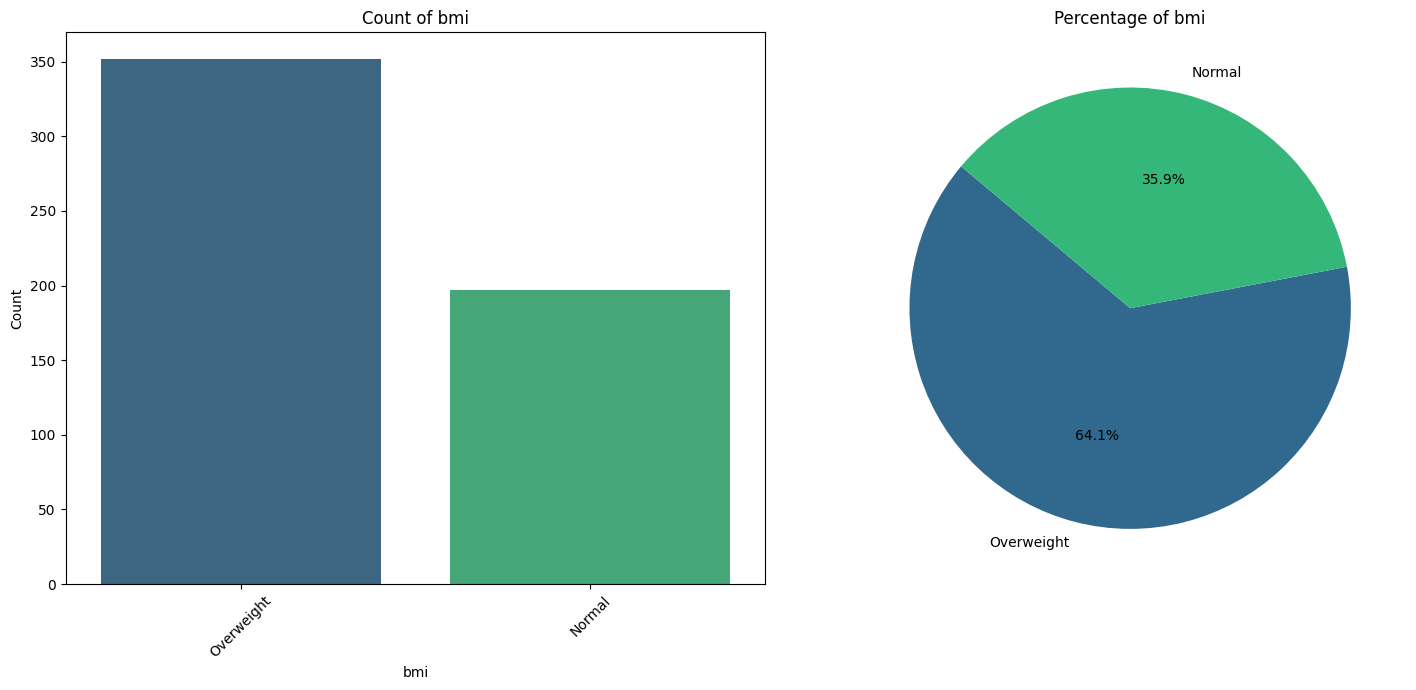

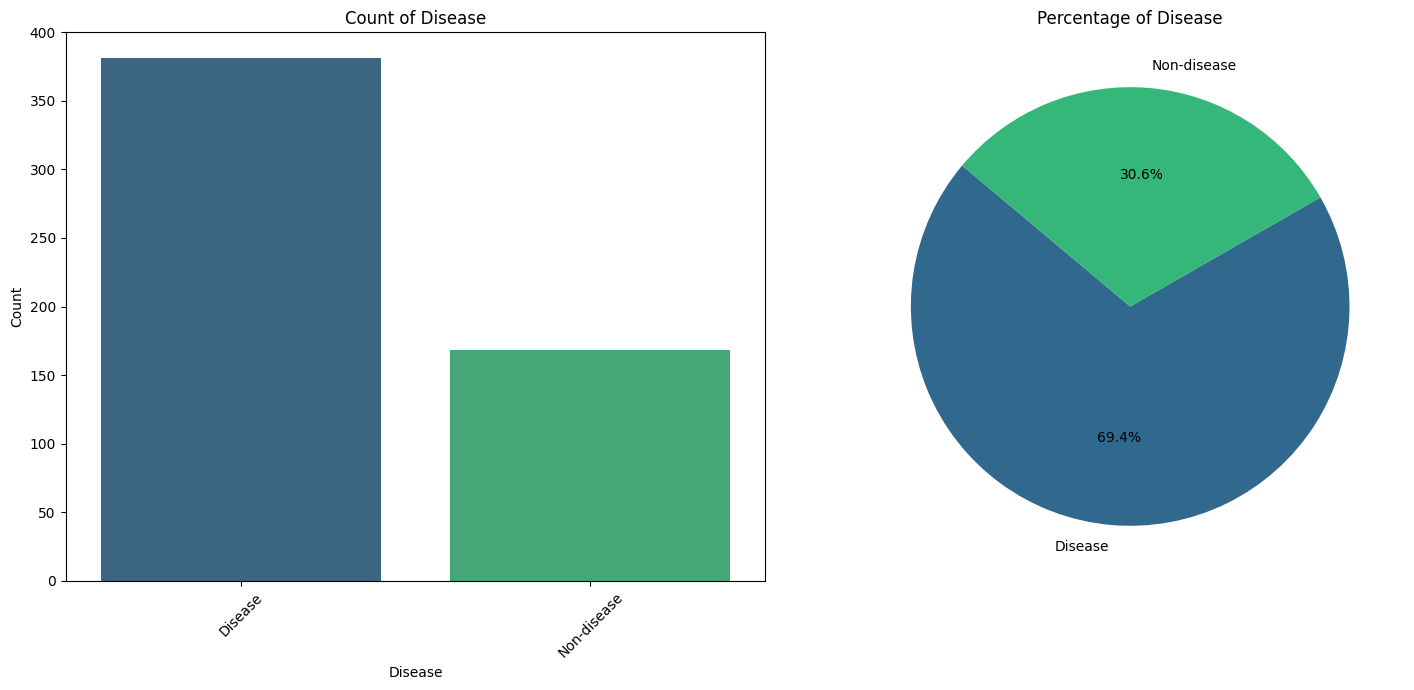

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns and their mappings
categorical_columns = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnic': {1: 'Malay', 2: 'Chinese', 3: 'Indian'},
    'bmi': {1: 'Overweight', 2: 'Normal'},
    'Disease': {1: 'Disease', 2: 'Non-disease'}
}

# Function to generate descriptive statistics for categorical columns
def descriptive_stats_categorical(df, columns):
    stats = {}
    for column, mapping in columns.items():
        df_copy = df.copy()  # Create a copy of the DataFrame
        df_copy[column] = df_copy[column].map(mapping)
        count = df_copy[column].value_counts()
        percentage = (count / len(df_copy[column])) * 100
        stats[column] = pd.concat([count, percentage], axis=1, keys=['Count', 'Percentage'])
    return stats

# Generate descriptive statistics for the categorical columns
categorical_stats = descriptive_stats_categorical(data_cleaned, categorical_columns)

# Visualize the statistics using bar and pie charts side by side
for column, stats in categorical_stats.items():
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Bar Chart
    sns.barplot(x=stats.index, y=stats['Count'], hue=stats.index, dodge=False, palette='viridis', ax=axes[0], legend=False)
    axes[0].set_title(f'Count of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

    # Pie Chart
    axes[1].pie(stats['Count'], labels=stats.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(stats)))
    axes[1].set_title(f'Percentage of {column}')

    plt.tight_layout()
    plt.show()


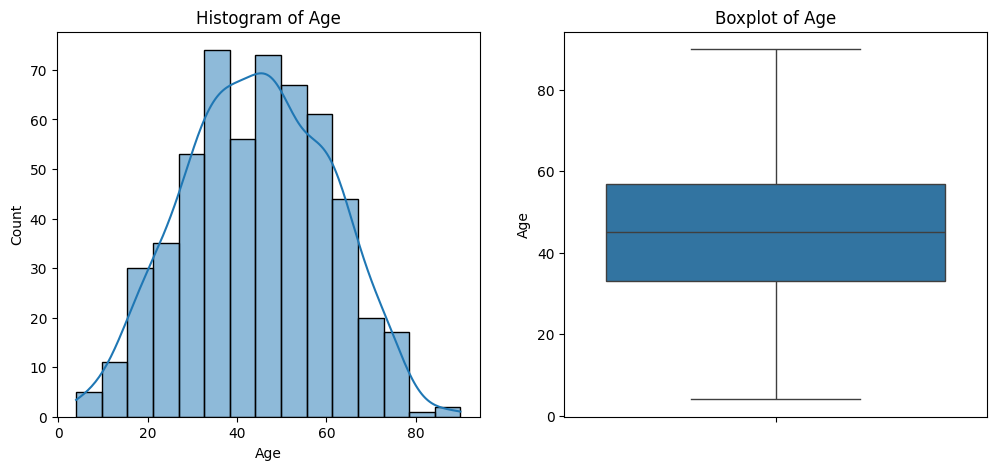

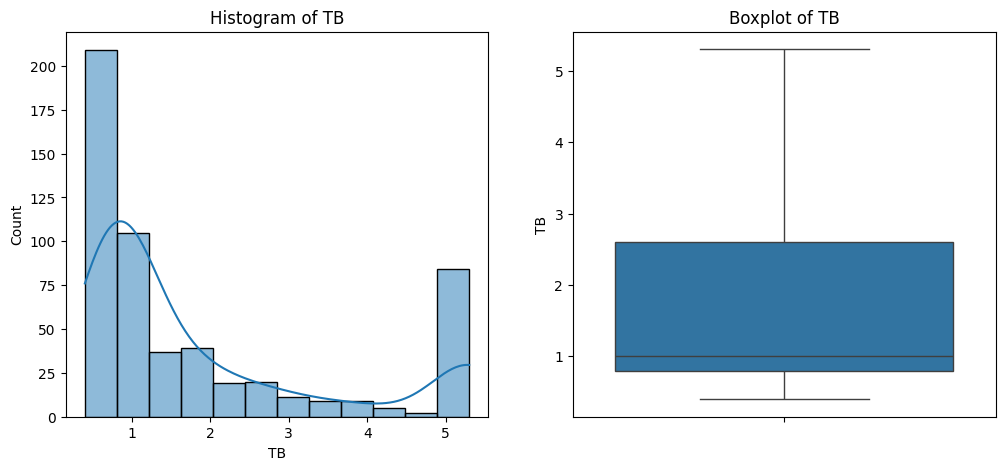

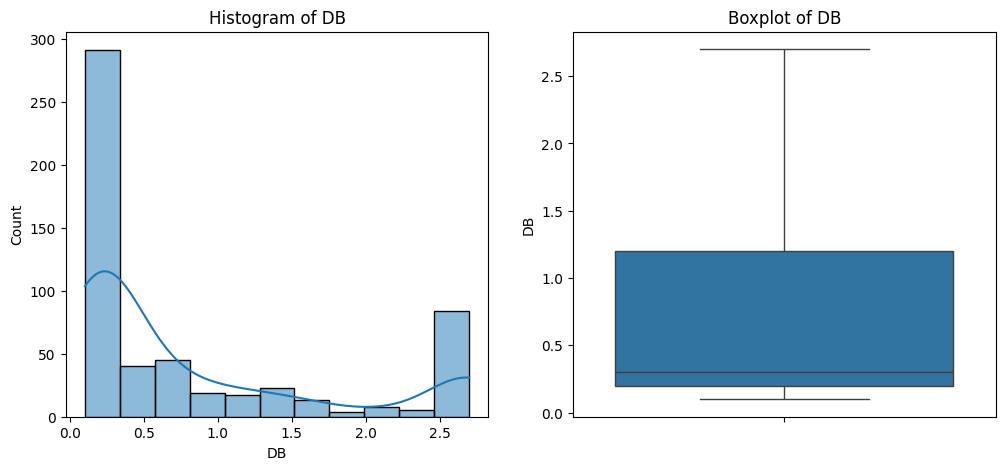

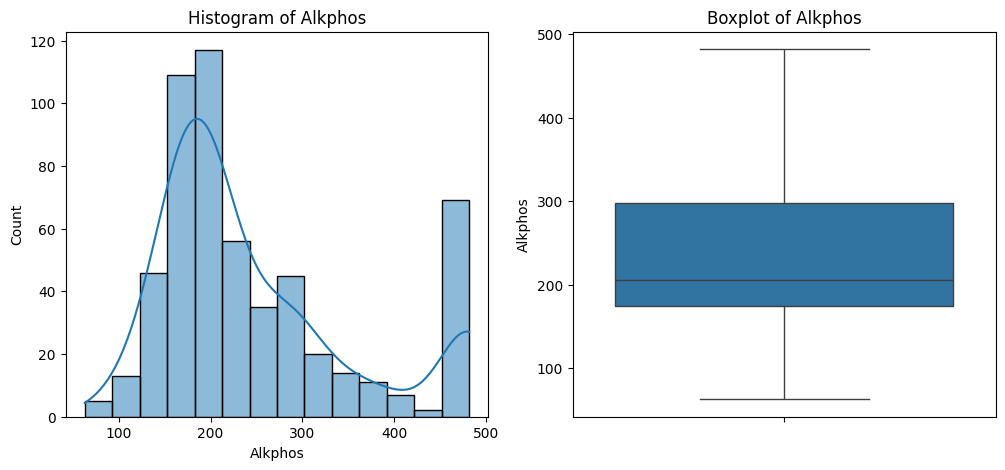

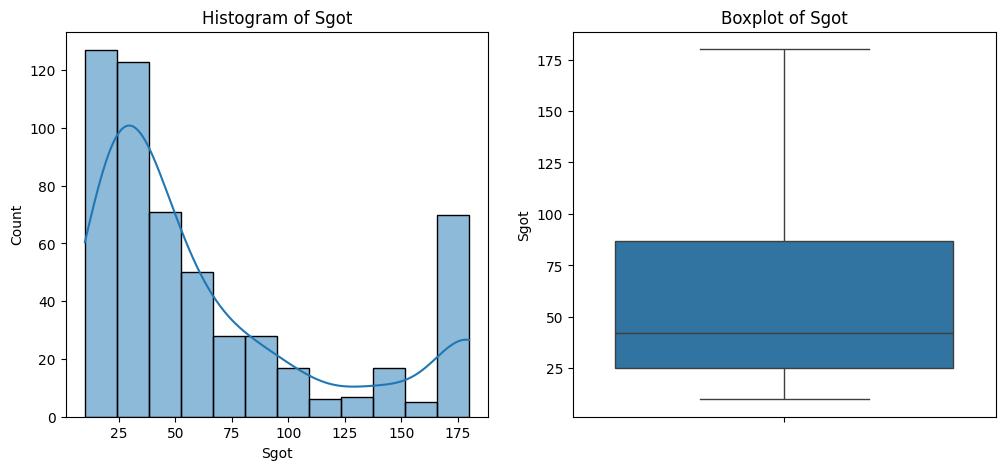

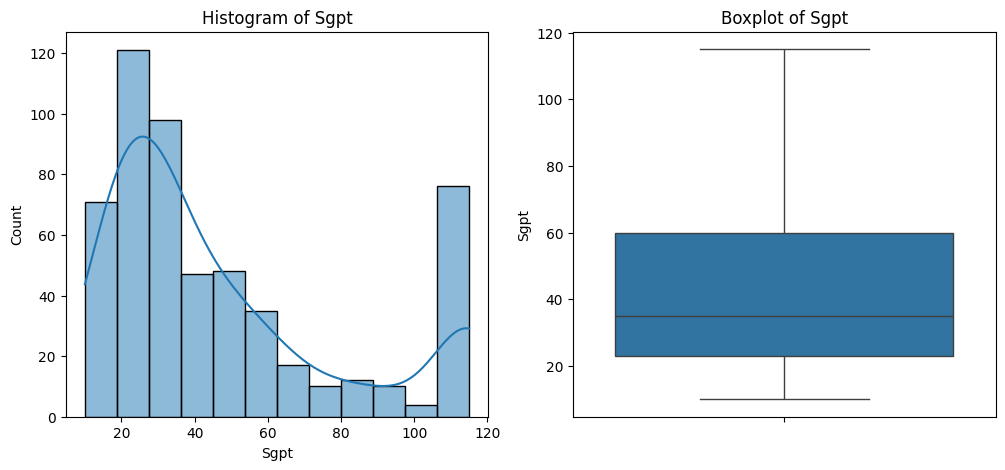

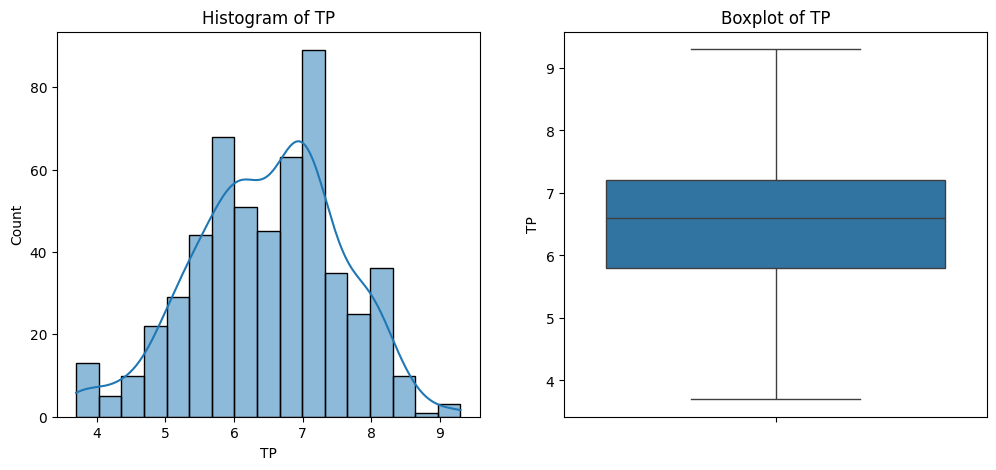

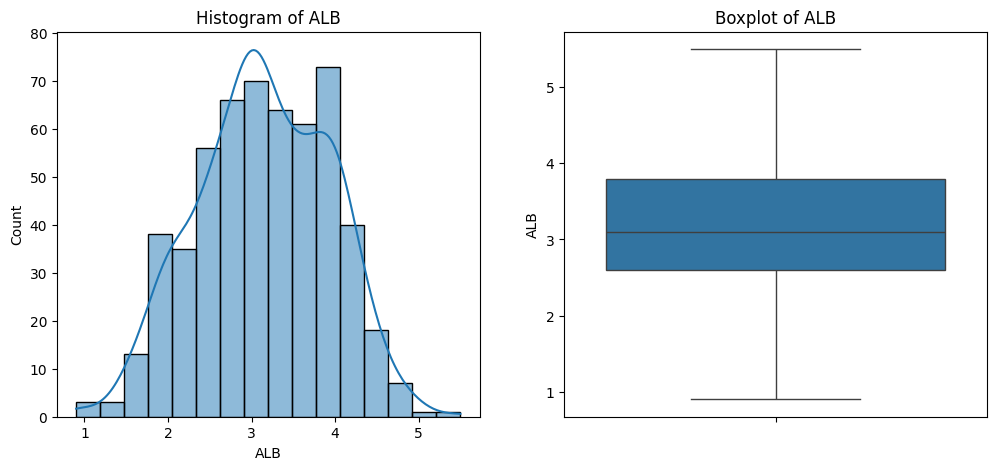

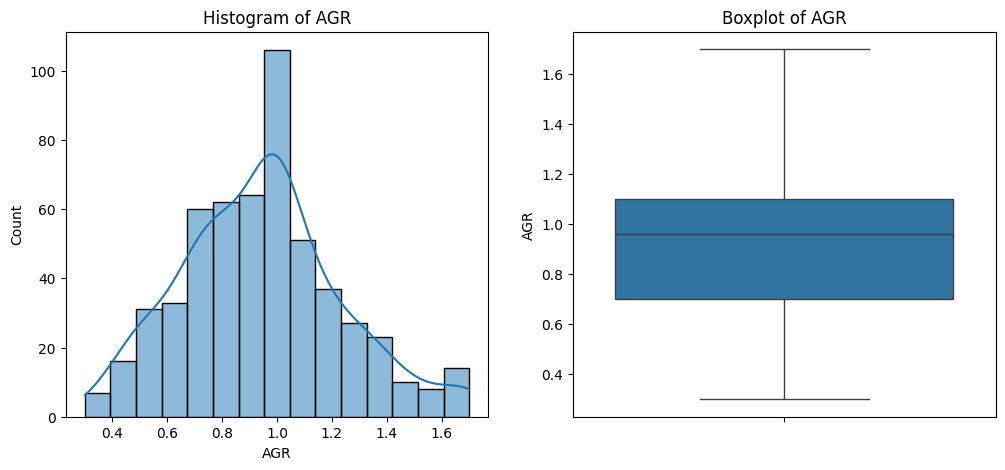

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['Age', 'TB', 'DB', 'Alkphos', 'Sgot', 'Sgpt', 'TP', 'ALB', 'AGR']

# Create histograms and boxplots for numerical data
for column in numerical_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data_cleaned[column])
    plt.title(f'Boxplot of {column}')

    plt.show()


---

**Class Distribution**

In [13]:
from sklearn.preprocessing import StandardScaler

# Define the feature set 'X' and target variable 'y'
X = data_cleaned.drop(columns=['Disease'])
y = data_cleaned['Disease']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check class distribution in the original data
print("Original class distribution:")
print(y.value_counts())

Original class distribution:
Disease
1    381
2    168
Name: count, dtype: int64


**Features Scaling**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the feature set 'X' and target variable 'y'
X = data_cleaned.drop(columns=['Disease'])
y = data_cleaned['Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data to confirm the changes
pd.DataFrame(X_train_scaled, columns=X.columns).head()


,Age,TB,DB,Alkphos,Sgot,Sgpt,TP,ALB,AGR,Ethnic,Gender,bmi
0,1.256210,-0.735127,-0.693529,-0.636857,-0.679715,-0.751365,0.299036,-0.309299,-0.830958,-0.972951,1.806138,1.333597
1,-0.295670,-0.614054,-0.585181,-0.506772,-0.310300,0.646173,0.299036,-0.062646,-0.497084,-0.972951,-0.553667,-0.749852
2,0.387157,0.596679,0.498304,2.150677,-0.568890,-0.781746,0.484064,-0.925931,-1.498706,-0.972951,-0.553667,-0.749852
3,0.014706,0.596679,0.606653,-0.376688,0.059115,0.798079,0.669091,0.553986,0.170664,1.419908,-0.553667,1.333597
4,-0.854347,-0.674591,-0.693529,-0.859860,-0.901363,-0.812128,-0.441073,-0.185973,0.170664,-0.972951,1.806138,-0.749852


**SMOTE for Oversampling**

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display the shape of the training and testing sets to confirm the split
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

# Check the class distribution after resampling
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Training set shape: (439, 12)
Testing set shape: (110, 12)
Class distribution after SMOTE:
Disease
2    305
1    305
Name: count, dtype: int64


---

**Model 1 - Logistic Regression**

In [16]:
# Adjust the target variable for binary classification
y_resampled_adjusted = y_resampled.map({1: 0, 2: 1})
y_test_adjusted = y_test.map({1: 0, 2: 1})


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        76
           1       0.65      0.76      0.70        34

    accuracy                           0.80       110
   macro avg       0.77      0.79      0.78       110
weighted avg       0.81      0.80      0.80       110

Confusion Matrix:
 [[62 14]
 [ 8 26]]
Logistic Regression ROC-AUC Score: 0.8618421052631579


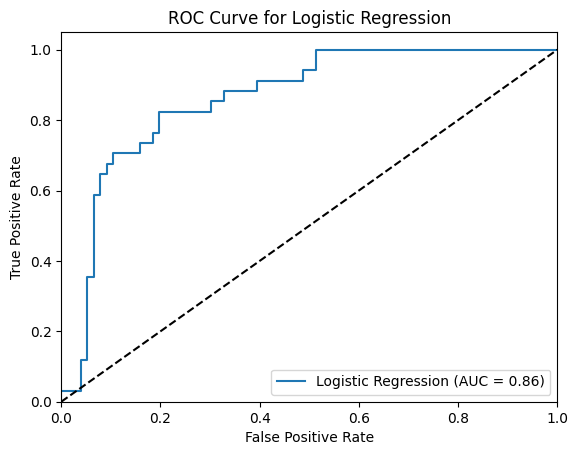

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the Logistic Regression model on the resampled training data
log_reg.fit(X_resampled, y_resampled_adjusted)

# Make predictions on the original testing data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test_adjusted, y_pred_log_reg))

# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test_adjusted, y_pred_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)

# ROC-AUC Score
roc_auc_log_reg = roc_auc_score(y_test_adjusted, log_reg.predict_proba(X_test)[:, 1])
print("Logistic Regression ROC-AUC Score:", roc_auc_log_reg)

# Plot ROC Curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_adjusted, log_reg.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [18]:
# Perform sensitivity analysis with different regularization strengths
for C_value in [0.01, 0.1, 1, 10, 100]:
    log_reg = LogisticRegression(C=C_value, random_state=42)
    log_reg.fit(X_resampled, y_resampled_adjusted)
    y_pred = log_reg.predict(X_test_scaled)
    roc_auc = roc_auc_score(y_test_adjusted, log_reg.predict_proba(X_test_scaled)[:, 1])
    print(f'C: {C_value}, ROC-AUC: {roc_auc:.2f}')

C: 0.01, ROC-AUC: 0.86
C: 0.1, ROC-AUC: 0.86
C: 1, ROC-AUC: 0.86
C: 10, ROC-AUC: 0.87
C: 100, ROC-AUC: 0.87


2. feature importance

In [19]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
result_log_reg = permutation_importance(log_reg, X_test_scaled, y_test_adjusted, n_repeats=10, random_state=42)
feature_importance_log_reg = pd.DataFrame({'Feature': X.columns, 'Importance': result_log_reg.importances_mean}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Logistic Regression Feature Importance:")
print(feature_importance_log_reg)

Logistic Regression Feature Importance:
    Feature  Importance
11      bmi    0.183636
7       ALB    0.107273
2        DB    0.056364
6        TP    0.035455
8       AGR    0.025455
5      Sgpt    0.014545
0       Age    0.006364
4      Sgot    0.004545
1        TB    0.002727
3   Alkphos    0.002727
9    Ethnic    0.000000
10   Gender   -0.003636


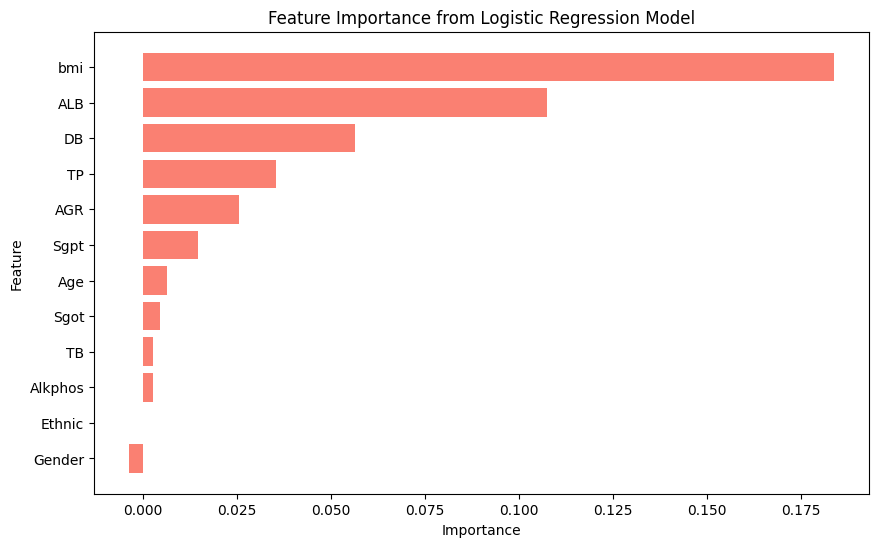

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance values for Logistic Regression
feature_importance_lr = {
    'Feature': ['bmi', 'ALB', 'DB', 'TP', 'AGR', 'Sgpt', 'Age', 'Sgot', 'TB', 'Alkphos', 'Ethnic', 'Gender'],
    'Importance': [0.183636, 0.107273, 0.056364, 0.035455, 0.025455, 0.014545, 0.006364, 0.004545, 0.002727, 0.002727, 0.000000, -0.003636]
}

# Convert to DataFrame
df_feature_importance_lr = pd.DataFrame(feature_importance_lr)

# Sort the features by importance
df_feature_importance_lr = df_feature_importance_lr.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance_lr['Feature'], df_feature_importance_lr['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Model')
plt.gca().invert_yaxis()
plt.show()


3. cross-validation

In [21]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Adjust the target variable for binary classification
y_train_adjusted = y_train.map({1: 0, 2: 1})

# Initialize and train the Logistic Regression model on the resampled training data
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_resampled, y_resampled_adjusted)

# Cross-Validation ROC-AUC Scores
cv_scores_log_reg = cross_val_score(log_reg, X_train_scaled, y_train_adjusted, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores_log_reg)
print("Mean ROC-AUC Score:", np.mean(cv_scores_log_reg))


Cross-Validation ROC-AUC Scores: [0.86338798 0.89435337 0.83363692 0.83242259 0.87200504]
Mean ROC-AUC Score: 0.8591611788333099


4. Performance matrics accross different threshold

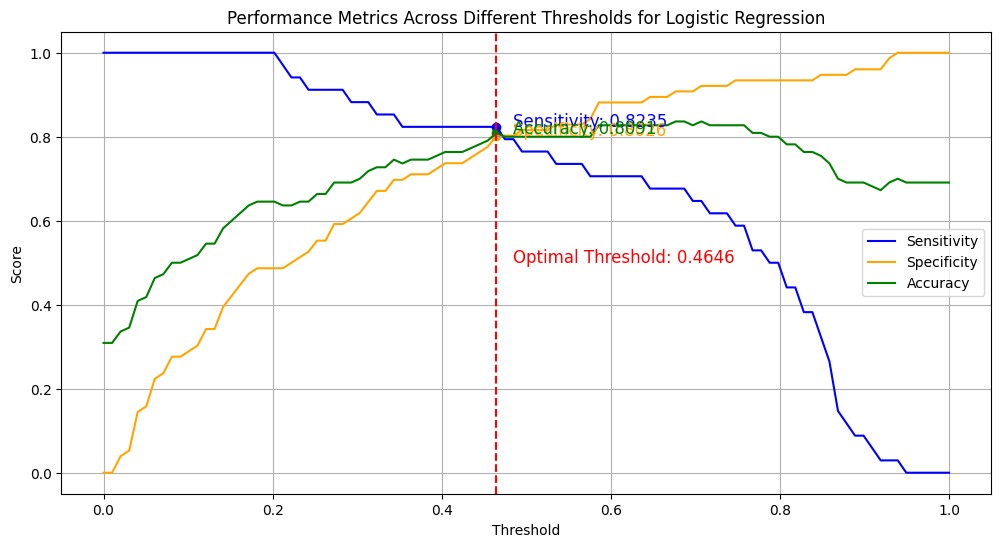

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

# Calculate probabilities
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Initialize lists to hold performance metrics
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []
precision_list = []
recall_list = []
accuracy_list = []

# Compute performance metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_log_reg >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_adjusted, y_pred_threshold).ravel()
    
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0  # Sensitivity
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Specificity
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    precision_list.append(tp / (tp + fp) if (tp + fp) != 0 else 0)
    recall_list.append(tpr)
    accuracy_list.append(accuracy)

# Plot Sensitivity, Specificity, and Accuracy vs Threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, tpr_list, label='Sensitivity', color='blue')
plt.plot(thresholds, [1 - fpr for fpr in fpr_list], label='Specificity', color='orange')
plt.plot(thresholds, accuracy_list, label='Accuracy', color='green')

# Find optimal threshold (example: where the sum of sensitivity and specificity is highest)
optimal_idx = np.argmax(np.array(tpr_list) + np.array([1 - fpr for fpr in fpr_list]))
optimal_threshold = thresholds[optimal_idx]
optimal_sensitivity = tpr_list[optimal_idx]
optimal_specificity = 1 - fpr_list[optimal_idx]
optimal_accuracy = accuracy_list[optimal_idx]

# Plot vertical line at optimal threshold
plt.axvline(x=optimal_threshold, color='red', linestyle='--')
plt.text(optimal_threshold + 0.02, 0.5, f'Optimal Threshold: {optimal_threshold:.4f}', color='red', fontsize=12)

# Annotate optimal points
plt.scatter([optimal_threshold], [optimal_sensitivity], color='blue')
plt.scatter([optimal_threshold], [optimal_specificity], color='orange')
plt.scatter([optimal_threshold], [optimal_accuracy], color='green')
plt.text(optimal_threshold + 0.02, optimal_sensitivity, f'Sensitivity: {optimal_sensitivity:.4f}', color='blue', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_specificity, f'Specificity: {optimal_specificity:.4f}', color='orange', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_accuracy, f'Accuracy: {optimal_accuracy:.4f}', color='green', fontsize=12)

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics Across Different Thresholds for Logistic Regression')
plt.legend(loc='best')
plt.grid(True)
plt.show()


5. RMSE & MARD

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predicted probabilities
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# True labels
y_true = y_test_adjusted

# RMSE calculation
rmse = np.sqrt(mean_squared_error(y_true, y_prob_log_reg))
print("Logistic Regression RMSE:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_prob_log_reg)

# MARD calculation: Mean Absolute Error divided by the mean of true labels
mard = mae / np.mean(y_true) if np.mean(y_true) != 0 else np.inf
print("Logistic Regression MARD:", mard)


Logistic Regression RMSE: 0.38130033052230267
Logistic Regression MARD: 0.9480414282518708


6. save the model

In [24]:
import joblib

# Save the model
joblib.dump(log_reg, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

----

**Model 2 - Random Forest**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        76
           1       0.76      0.65      0.70        34

    accuracy                           0.83       110
   macro avg       0.81      0.78      0.79       110
weighted avg       0.82      0.83      0.82       110

Confusion Matrix:
 [[69  7]
 [12 22]]
Random Forest ROC-AUC Score: 0.8463622291021672


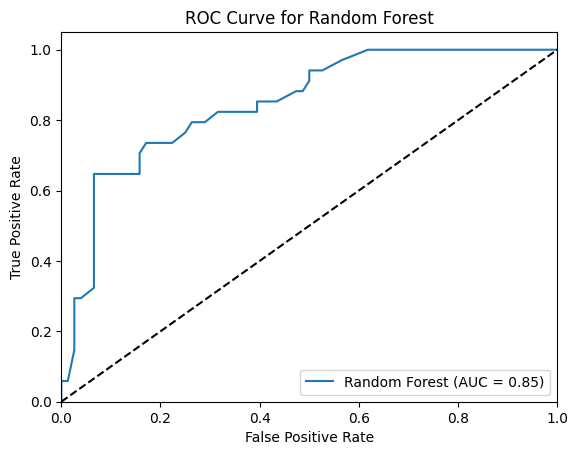

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Train the Random Forest model on the resampled training data
rf.fit(X_resampled, y_resampled_adjusted)

# Make predictions on the original testing data
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test_adjusted, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_adjusted, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test_adjusted, rf.predict_proba(X_test)[:, 1])
print("Random Forest ROC-AUC Score:", roc_auc_rf)

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_adjusted, rf.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [26]:
# Sensitivity Analysis (Hyperparameter tuning)
for n_estimators in [100, 200, 300]:
    rf_model = RandomForestClassifier(n_estimators=n_estimators)
    rf_model.fit(X_resampled, y_resampled_adjusted)
    y_pred = rf_model.predict(X_test_scaled)
    roc_auc = roc_auc_score(y_test_adjusted, rf_model.predict_proba(X_test_scaled)[:, 1])
    print(f'n_estimators: {n_estimators}, ROC-AUC: {roc_auc:.2f}')

n_estimators: 100, ROC-AUC: 0.85
n_estimators: 200, ROC-AUC: 0.85
n_estimators: 300, ROC-AUC: 0.86


2. feature importance

In [27]:
result_rf = permutation_importance(rf_model, X_test_scaled, y_test_adjusted, n_repeats=10, random_state=0)
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': result_rf.importances_mean}).sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importance:")
print(feature_importance_rf)

Random Forest Feature Importance:
    Feature    Importance
11      bmi  1.927273e-01
2        DB  4.636364e-02
4      Sgot  3.454545e-02
0       Age  3.000000e-02
3   Alkphos  1.818182e-02
5      Sgpt  1.363636e-02
1        TB  1.272727e-02
6        TP  1.181818e-02
8       AGR  1.000000e-02
10   Gender  2.727273e-03
9    Ethnic  1.818182e-03
7       ALB  3.330669e-17


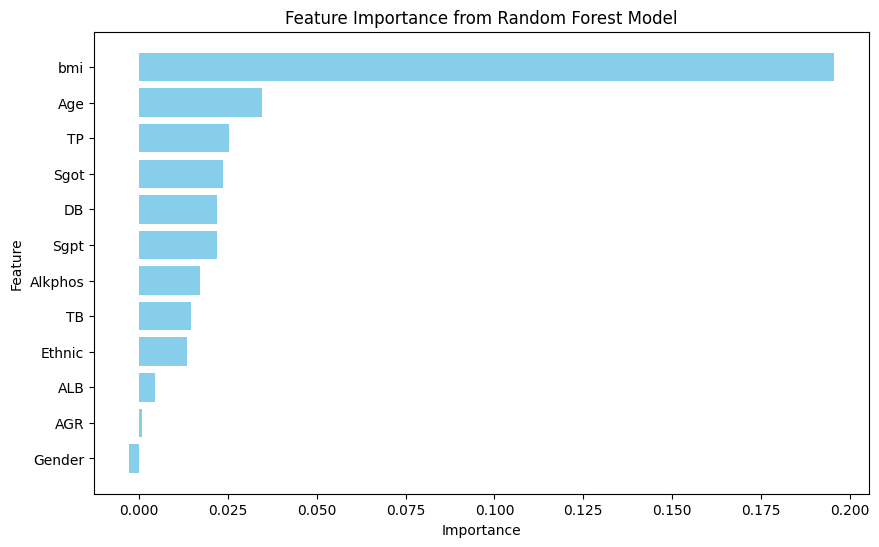

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance values for Random Forest
feature_importance_rf = {
    'Feature': ['bmi', 'Age', 'TP', 'Sgot', 'DB', 'Sgpt', 'Alkphos', 'TB', 'Ethnic', 'ALB', 'AGR', 'Gender'],
    'Importance': [0.195455, 0.034545, 0.025455, 0.023636, 0.021818, 0.021818, 0.017273, 0.014545, 0.013636, 0.004545, 0.000909, -0.002727]
}

# Convert to DataFrame
df_feature_importance_rf = pd.DataFrame(feature_importance_rf)

# Sort the features by importance
df_feature_importance_rf = df_feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance_rf['Feature'], df_feature_importance_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


3. cross-validation

In [29]:
# Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X_resampled, y_resampled_adjusted, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores_rf)
print("Mean ROC-AUC Score:", cv_scores_rf.mean())

Cross-Validation ROC-AUC Scores: [0.89868315 0.9160172  0.95632894 0.96627251 0.97003494]
Mean ROC-AUC Score: 0.9414673474872346


4. Performance matrics accross different threshold

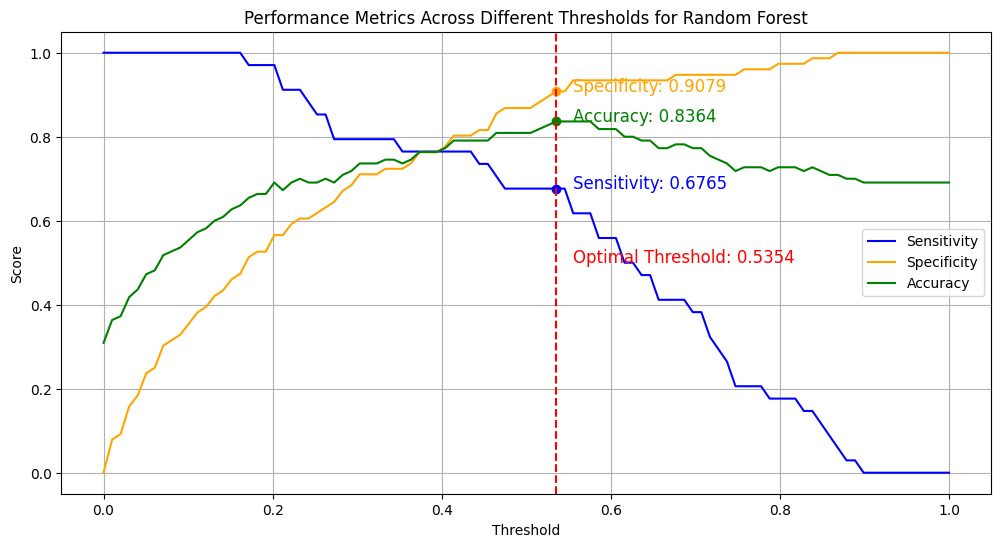

In [30]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the Random Forest model on the resampled training data
rf_model.fit(X_resampled, y_resampled_adjusted)

# Calculate probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Initialize lists to hold performance metrics
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []
precision_list = []
recall_list = []
accuracy_list = []

# Compute performance metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_rf >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_adjusted, y_pred_threshold).ravel()
    
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0  # Sensitivity
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Specificity
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    precision_list.append(tp / (tp + fp) if (tp + fp) != 0 else 0)
    recall_list.append(tpr)
    accuracy_list.append(accuracy)

# Plot Sensitivity, Specificity, and Accuracy vs Threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, tpr_list, label='Sensitivity', color='blue')
plt.plot(thresholds, [1 - fpr for fpr in fpr_list], label='Specificity', color='orange')
plt.plot(thresholds, accuracy_list, label='Accuracy', color='green')

# Find optimal threshold (example: where the sum of sensitivity and specificity is highest)
optimal_idx = np.argmax(np.array(tpr_list) + np.array([1 - fpr for fpr in fpr_list]))
optimal_threshold = thresholds[optimal_idx]
optimal_sensitivity = tpr_list[optimal_idx]
optimal_specificity = 1 - fpr_list[optimal_idx]
optimal_accuracy = accuracy_list[optimal_idx]

# Plot vertical line at optimal threshold
plt.axvline(x=optimal_threshold, color='red', linestyle='--')
plt.text(optimal_threshold + 0.02, 0.5, f'Optimal Threshold: {optimal_threshold:.4f}', color='red', fontsize=12)

# Annotate optimal points
plt.scatter([optimal_threshold], [optimal_sensitivity], color='blue')
plt.scatter([optimal_threshold], [optimal_specificity], color='orange')
plt.scatter([optimal_threshold], [optimal_accuracy], color='green')
plt.text(optimal_threshold + 0.02, optimal_sensitivity, f'Sensitivity: {optimal_sensitivity:.4f}', color='blue', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_specificity, f'Specificity: {optimal_specificity:.4f}', color='orange', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_accuracy, f'Accuracy: {optimal_accuracy:.4f}', color='green', fontsize=12)

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics Across Different Thresholds for Random Forest')
plt.legend(loc='best')
plt.grid(True)
plt.show()


5. RMSE & MARD

In [31]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the Random Forest model on the resampled training data
rf_model.fit(X_resampled, y_resampled_adjusted)

# Predicted probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# True labels
y_true = y_test_adjusted

# RMSE calculation
rmse_rf = np.sqrt(mean_squared_error(y_true, y_prob_rf))
print("Random Forest RMSE:", rmse_rf)

# Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_true, y_prob_rf)

# MARD calculation: Mean Absolute Error divided by the mean of true labels
mard_rf = mae_rf / np.mean(y_true) if np.mean(y_true) != 0 else np.inf
print("Random Forest MARD:", mard_rf)


Random Forest RMSE: 0.37288067796548535
Random Forest MARD: 0.9476470588235294


6. save the model

In [32]:
import joblib

# Save the Random Forest model to a file
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

---

**Model 3 - LGBM**

[LightGBM] [Info] Number of positive: 305, number of negative: 305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 610, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

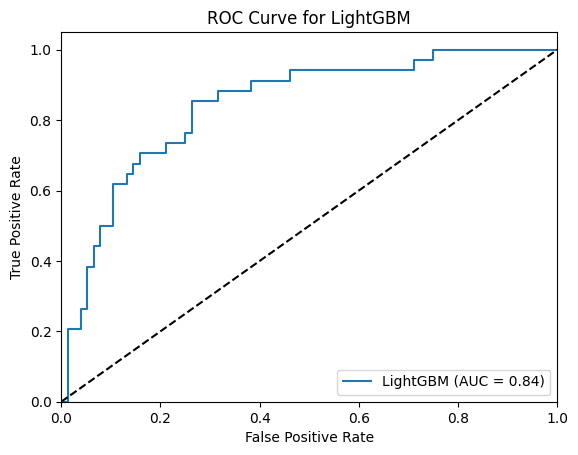

In [33]:
import lightgbm as lgb

# Initialize the LightGBM model
lgbm = lgb.LGBMClassifier()

# Train the LightGBM model on the resampled training data
lgbm.fit(X_resampled, y_resampled_adjusted)

# Make predictions on the original testing data
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Classification Report:")
print(classification_report(y_test_adjusted, y_pred_lgbm))

# Confusion Matrix
conf_matrix_lgbm = confusion_matrix(y_test_adjusted, y_pred_lgbm)
print("Confusion Matrix:\n", conf_matrix_lgbm)

# ROC-AUC Score
roc_auc_lgbm = roc_auc_score(y_test_adjusted, lgbm.predict_proba(X_test)[:, 1])
print("LightGBM ROC-AUC Score:", roc_auc_lgbm)

# Plot ROC Curve
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test_adjusted, lgbm.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_lgbm, tpr_lgbm, label='LightGBM (AUC = %0.2f)' % roc_auc_lgbm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [34]:
from sklearn.model_selection import GridSearchCV

# Sensitivity Analysis (Hyperparameter tuning) using GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# Initialize the GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_lgb.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search_lgb.best_params_)
print("Best ROC-AUC score: ", grid_search_lgb.best_score_)

[LightGBM] [Info] Number of positive: 134, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 439, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305239 -> initscore=-0.822472
[LightGBM] [Info] Start training from score -0.822472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

2. features importance

In [35]:
result_lgb = permutation_importance(lgbm, X_test_scaled, y_test_adjusted, n_repeats=10, random_state=0)
feature_importance_lgb = pd.DataFrame({'Feature': X.columns, 'Importance': result_lgb.importances_mean}).sort_values(by='Importance', ascending=False)
print("LightGBM Feature Importance:")
print(feature_importance_lgb)

LightGBM Feature Importance:
    Feature  Importance
11      bmi    0.118182
8       AGR    0.016364
3   Alkphos    0.012727
9    Ethnic    0.008182
4      Sgot    0.003636
1        TB    0.002727
10   Gender    0.000909
2        DB   -0.001818
5      Sgpt   -0.006364
6        TP   -0.017273
7       ALB   -0.025455
0       Age   -0.030000


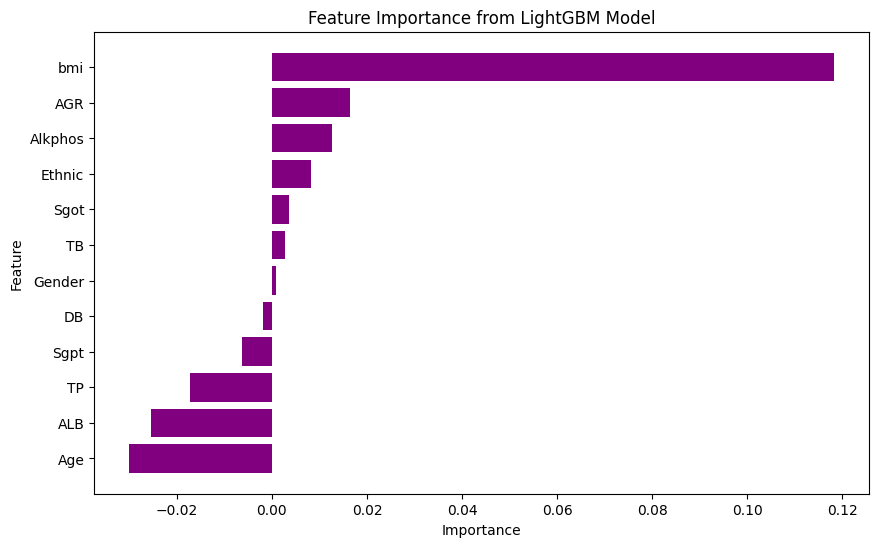

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance values for LightGBM
feature_importance_lgbm = {
    'Feature': ['bmi', 'AGR', 'Alkphos', 'Ethnic', 'Sgot', 'TB', 'Gender', 'DB', 'Sgpt', 'TP', 'ALB', 'Age'],
    'Importance': [0.118182, 0.016364, 0.012727, 0.008182, 0.003636, 0.002727, 0.000909, -0.001818, -0.006364, -0.017273, -0.025455, -0.030000]
}

# Convert to DataFrame
df_feature_importance_lgbm = pd.DataFrame(feature_importance_lgbm)

# Sort the features by importance
df_feature_importance_lgbm = df_feature_importance_lgbm.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance_lgbm['Feature'], df_feature_importance_lgbm['Importance'], color='purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from LightGBM Model')
plt.gca().invert_yaxis()
plt.show()


3. cross-validation

In [37]:
from sklearn.model_selection import cross_val_score
cv_scores_lgb = cross_val_score(lgbm, X_resampled, y_resampled_adjusted, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores_lgb)
print("Mean ROC-AUC Score:", cv_scores_lgb.mean())

[LightGBM] [Info] Number of positive: 244, number of negative: 244
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 488, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

4. Performance matrics accross different threshold

[LightGBM] [Info] Number of positive: 305, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 610, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

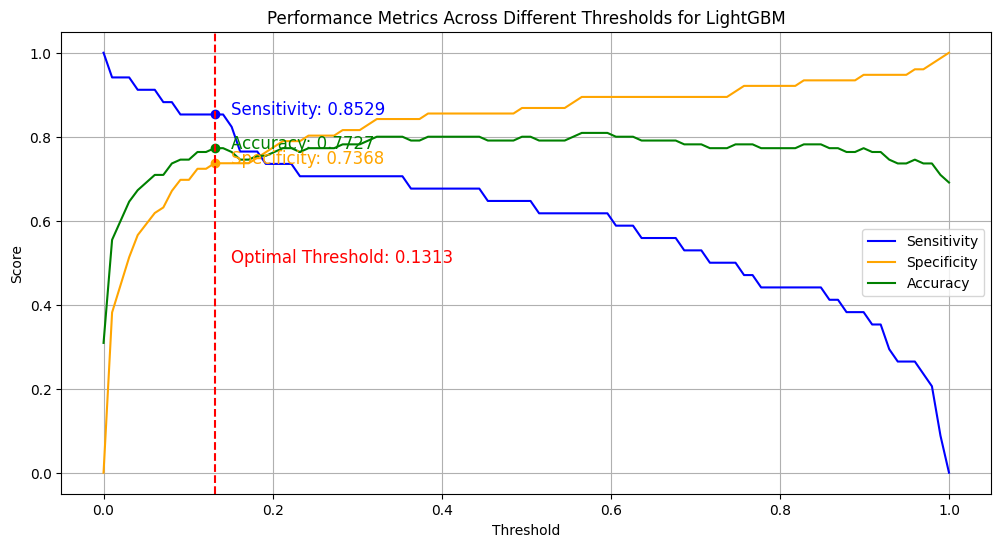

In [38]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

# Initialize the LightGBM model
lgbm_model = lgb.LGBMClassifier()

# Train the LightGBM model on the resampled training data
lgbm_model.fit(X_resampled, y_resampled_adjusted)

# Calculate probabilities
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Initialize lists to hold performance metrics
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []
precision_list = []
recall_list = []
accuracy_list = []

# Compute performance metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_lgbm >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_adjusted, y_pred_threshold).ravel()
    
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0  # Sensitivity
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Specificity
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    precision_list.append(tp / (tp + fp) if (tp + fp) != 0 else 0)
    recall_list.append(tpr)
    accuracy_list.append(accuracy)

# Plot Sensitivity, Specificity, and Accuracy vs Threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, tpr_list, label='Sensitivity', color='blue')
plt.plot(thresholds, [1 - fpr for fpr in fpr_list], label='Specificity', color='orange')
plt.plot(thresholds, accuracy_list, label='Accuracy', color='green')

# Find optimal threshold (example: where the sum of sensitivity and specificity is highest)
optimal_idx = np.argmax(np.array(tpr_list) + np.array([1 - fpr for fpr in fpr_list]))
optimal_threshold = thresholds[optimal_idx]
optimal_sensitivity = tpr_list[optimal_idx]
optimal_specificity = 1 - fpr_list[optimal_idx]
optimal_accuracy = accuracy_list[optimal_idx]

# Plot vertical line at optimal threshold
plt.axvline(x=optimal_threshold, color='red', linestyle='--')
plt.text(optimal_threshold + 0.02, 0.5, f'Optimal Threshold: {optimal_threshold:.4f}', color='red', fontsize=12)

# Annotate optimal points
plt.scatter([optimal_threshold], [optimal_sensitivity], color='blue')
plt.scatter([optimal_threshold], [optimal_specificity], color='orange')
plt.scatter([optimal_threshold], [optimal_accuracy], color='green')
plt.text(optimal_threshold + 0.02, optimal_sensitivity, f'Sensitivity: {optimal_sensitivity:.4f}', color='blue', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_specificity, f'Specificity: {optimal_specificity:.4f}', color='orange', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_accuracy, f'Accuracy: {optimal_accuracy:.4f}', color='green', fontsize=12)

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics Across Different Thresholds for LightGBM')
plt.legend(loc='best')
plt.grid(True)
plt.show()


5. RMSE & MARD

In [39]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the LightGBM model
lgbm_model = lgb.LGBMClassifier()

# Train the LightGBM model on the resampled training data
lgbm_model.fit(X_resampled, y_resampled_adjusted)

# Predicted probabilities
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# True labels
y_true = y_test_adjusted

# RMSE calculation
rmse_lgbm = np.sqrt(mean_squared_error(y_true, y_prob_lgbm))
print("LightGBM RMSE:", rmse_lgbm)

# Mean Absolute Error (MAE)
mae_lgbm = mean_absolute_error(y_true, y_prob_lgbm)

# MARD calculation: Mean Absolute Error divided by the mean of true labels
mard_lgbm = mae_lgbm / np.mean(y_true) if np.mean(y_true) != 0 else np.inf
print("LightGBM MARD:", mard_lgbm)


[LightGBM] [Info] Number of positive: 305, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.179894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 610, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

6. save the model

In [40]:
import joblib

# Save the LightGBM model to a file
joblib.dump(lgbm, 'lightgbm_model.pkl')


['lightgbm_model.pkl']

---

**Model 4 - kNN**

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        76
           1       0.59      0.79      0.68        34

    accuracy                           0.76       110
   macro avg       0.74      0.77      0.74       110
weighted avg       0.80      0.76      0.77       110

Confusion Matrix:
 [[57 19]
 [ 7 27]]
K-Nearest Neighbors ROC-AUC Score: 0.8564241486068112


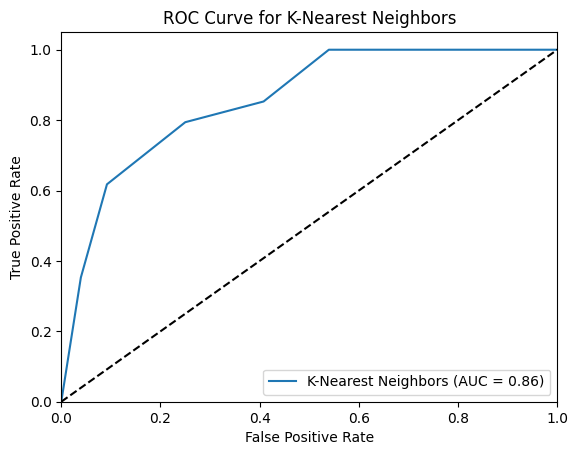

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model
knn = KNeighborsClassifier()

# Train the K-Nearest Neighbors model on the resampled training data
knn.fit(X_resampled, y_resampled_adjusted)

# Make predictions on the original testing data
y_pred_knn = knn.predict(X_test)

# Evaluate the K-Nearest Neighbors model
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test_adjusted, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test_adjusted, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix_knn)

# ROC-AUC Score
roc_auc_knn = roc_auc_score(y_test_adjusted, knn.predict_proba(X_test)[:, 1])
print("K-Nearest Neighbors ROC-AUC Score:", roc_auc_knn)

# Plot ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test_adjusted, knn.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [42]:
from sklearn.model_selection import GridSearchCV

# Sensitivity Analysis (Hyperparameter tuning) using GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_knn.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search_knn.best_params_)
print("Best ROC-AUC score: ", grid_search_knn.best_score_)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best ROC-AUC score:  0.8582901312409508


2. features importance

In [43]:
# Feature Importance (Not applicable for KNN directly, use permutation importance)
result_knn = permutation_importance(grid_search_knn.best_estimator_, X_test_scaled, y_test_adjusted, n_repeats=10, random_state=0)
feature_importance_knn = pd.DataFrame({'Feature': X.columns, 'Importance': result_knn.importances_mean}).sort_values(by='Importance', ascending=False)
print("K-Nearest Neighbors Feature Importance:")
print(feature_importance_knn)

K-Nearest Neighbors Feature Importance:
    Feature  Importance
11      bmi    0.153636
9    Ethnic    0.017273
2        DB    0.007273
3   Alkphos    0.007273
8       AGR    0.006364
1        TB    0.005455
6        TP    0.005455
10   Gender    0.003636
5      Sgpt   -0.002727
7       ALB   -0.003636
0       Age   -0.003636
4      Sgot   -0.016364


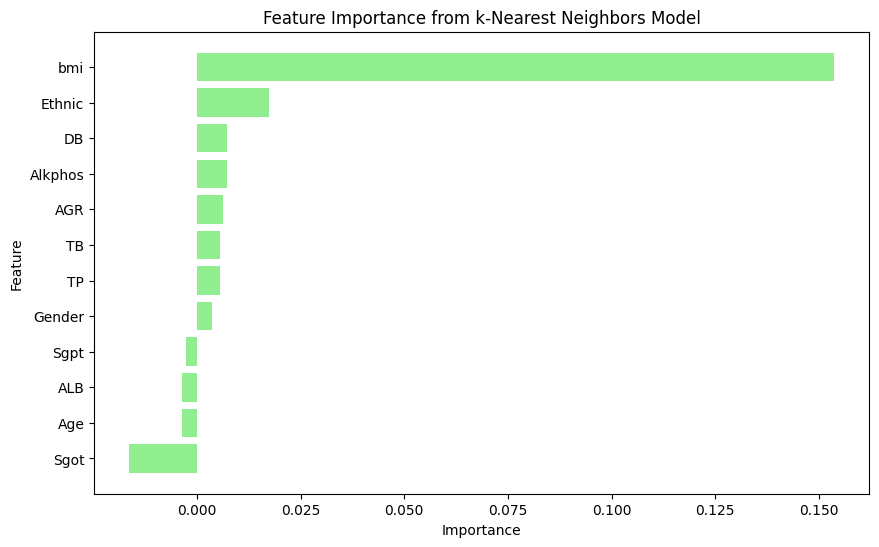

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance values for kNN
feature_importance_knn = {
    'Feature': ['bmi', 'Ethnic', 'DB', 'Alkphos', 'AGR', 'TB', 'TP', 'Gender', 'Sgpt', 'ALB', 'Age', 'Sgot'],
    'Importance': [0.153636, 0.017273, 0.007273, 0.007273, 0.006364, 0.005455, 0.005455, 0.003636, -0.002727, -0.003636, -0.003636, -0.016364]
}

# Convert to DataFrame
df_feature_importance_knn = pd.DataFrame(feature_importance_knn)

# Sort the features by importance
df_feature_importance_knn = df_feature_importance_knn.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance_knn['Feature'], df_feature_importance_knn['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from k-Nearest Neighbors Model')
plt.gca().invert_yaxis()
plt.show()


- Unlike tree-based models, KNN does not provide intrinsic feature importance. Therefore, feature importance analysis is not applicable for KNN.

3, cross-validation

In [45]:
from sklearn.model_selection import cross_val_score
# Cross-Validation with the best estimator
cv_scores_knn = cross_val_score(grid_search_knn.best_estimator_, X_resampled, y_resampled_adjusted, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores_knn)
print("Mean ROC-AUC Score:", cv_scores_knn.mean())


Cross-Validation ROC-AUC Scores: [0.91830153 0.91977963 0.9238108  0.94006987 0.95041655]
Mean ROC-AUC Score: 0.9304756785810266


4. Performance matrics accross different threshold

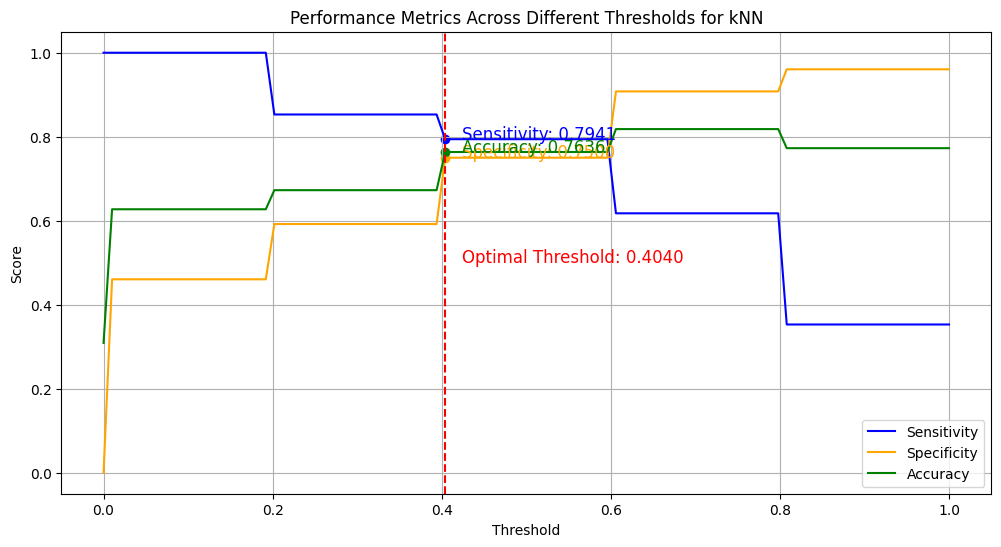

In [46]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

# Initialize the kNN model
knn_model = KNeighborsClassifier()

# Train the kNN model on the resampled training data
knn_model.fit(X_resampled, y_resampled_adjusted)

# Calculate probabilities
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Initialize lists to hold performance metrics
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []
precision_list = []
recall_list = []
accuracy_list = []

# Compute performance metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_knn >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_adjusted, y_pred_threshold).ravel()
    
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0  # Sensitivity
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Specificity
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    precision_list.append(tp / (tp + fp) if (tp + fp) != 0 else 0)
    recall_list.append(tpr)
    accuracy_list.append(accuracy)

# Plot Sensitivity, Specificity, and Accuracy vs Threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, tpr_list, label='Sensitivity', color='blue')
plt.plot(thresholds, [1 - fpr for fpr in fpr_list], label='Specificity', color='orange')
plt.plot(thresholds, accuracy_list, label='Accuracy', color='green')

# Find optimal threshold (example: where the sum of sensitivity and specificity is highest)
optimal_idx = np.argmax(np.array(tpr_list) + np.array([1 - fpr for fpr in fpr_list]))
optimal_threshold = thresholds[optimal_idx]
optimal_sensitivity = tpr_list[optimal_idx]
optimal_specificity = 1 - fpr_list[optimal_idx]
optimal_accuracy = accuracy_list[optimal_idx]

# Plot vertical line at optimal threshold
plt.axvline(x=optimal_threshold, color='red', linestyle='--')
plt.text(optimal_threshold + 0.02, 0.5, f'Optimal Threshold: {optimal_threshold:.4f}', color='red', fontsize=12)

# Annotate optimal points
plt.scatter([optimal_threshold], [optimal_sensitivity], color='blue')
plt.scatter([optimal_threshold], [optimal_specificity], color='orange')
plt.scatter([optimal_threshold], [optimal_accuracy], color='green')
plt.text(optimal_threshold + 0.02, optimal_sensitivity, f'Sensitivity: {optimal_sensitivity:.4f}', color='blue', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_specificity, f'Specificity: {optimal_specificity:.4f}', color='orange', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_accuracy, f'Accuracy: {optimal_accuracy:.4f}', color='green', fontsize=12)

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics Across Different Thresholds for kNN')
plt.legend(loc='best')
plt.grid(True)
plt.show()


5. RMSE & MARD

In [47]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the kNN model
knn_model = KNeighborsClassifier()

# Train the kNN model on the resampled training data
knn_model.fit(X_resampled, y_resampled_adjusted)

# Predicted probabilities
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# True labels
y_true = y_test_adjusted

# RMSE calculation
rmse_knn = np.sqrt(mean_squared_error(y_true, y_prob_knn))
print("kNN RMSE:", rmse_knn)

# Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_true, y_prob_knn)

# MARD calculation: Mean Absolute Error divided by the mean of true labels
mard_knn = mae_knn / np.mean(y_true) if np.mean(y_true) != 0 else np.inf
print("kNN MARD:", mard_knn)


kNN RMSE: 0.3981776670601386
kNN MARD: 0.8705882352941177


6. save the model

In [48]:
import joblib

# Save the KNN model to a file
joblib.dump(grid_search_knn.best_estimator_, 'knn_model.pkl')


['knn_model.pkl']

---

**Model 5 - SVM**

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        76
           1       0.73      0.71      0.72        34

    accuracy                           0.83       110
   macro avg       0.80      0.79      0.80       110
weighted avg       0.83      0.83      0.83       110

Confusion Matrix:
 [[67  9]
 [10 24]]
Support Vector Machine ROC-AUC Score: 0.8575851393188854


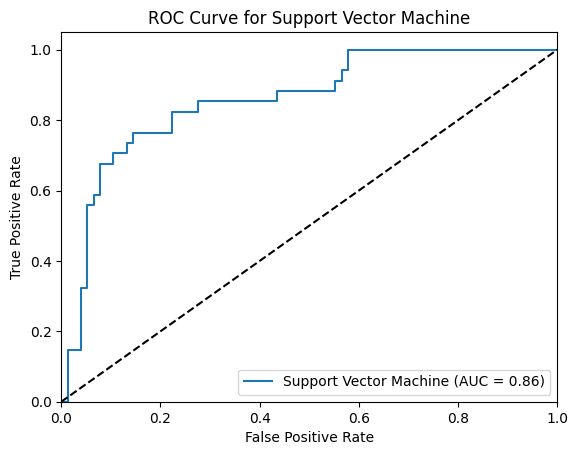

In [49]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm = SVC(probability=True)

# Train the Support Vector Machine model on the resampled training data
svm.fit(X_resampled, y_resampled_adjusted)

# Make predictions on the original testing data
y_pred_svm = svm.predict(X_test)

# Evaluate the Support Vector Machine model
print("Support Vector Machine Classification Report:")
print(classification_report(y_test_adjusted, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test_adjusted, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

# ROC-AUC Score
roc_auc_svm = roc_auc_score(y_test_adjusted, svm.predict_proba(X_test)[:, 1])
print("Support Vector Machine ROC-AUC Score:", roc_auc_svm)

# Plot ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test_adjusted, svm.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [50]:
from sklearn.model_selection import GridSearchCV

# Sensitivity Analysis (Hyperparameter tuning) using GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize the GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_svm.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search_svm.best_params_)
print("Best ROC-AUC score: ", grid_search_svm.best_score_)


Best parameters found:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best ROC-AUC score:  0.8625986642380085


2. features importance

- Support Vector Machines (SVMs) do not provide intrinsic feature importance in the same way tree-based models do. However, for linear SVMs, can look at the coefficients to get an idea of the importance of features. For non-linear SVMs, this becomes more complex, but one common approach is to use permutation feature importance.

In [51]:
# Check if the best estimator is linear
if grid_search_svm.best_params_['kernel'] == 'linear':
    # Extract feature importance (coefficients)
    feature_importance = grid_search_svm.best_estimator_.coef_[0]
    
    # Create a DataFrame to display feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)
    
    print("Feature Importance:\n", feature_importance_df)


In [52]:
from sklearn.inspection import permutation_importance

# Feature Importance for SVM (using permutation importance)
result_svm = permutation_importance(grid_search_svm.best_estimator_, X_test_scaled, y_test_adjusted, n_repeats=10, random_state=0)
feature_importance_svm = pd.DataFrame({'Feature': X.columns, 'Importance': result_svm.importances_mean}).sort_values(by='Importance', ascending=False)
print("Support Vector Machine Feature Importance:")
print(feature_importance_svm)

Support Vector Machine Feature Importance:
    Feature  Importance
11      bmi    0.192727
2        DB    0.027273
1        TB    0.017273
0       Age    0.016364
4      Sgot    0.014545
5      Sgpt    0.013636
6        TP    0.009091
3   Alkphos    0.006364
9    Ethnic    0.004545
8       AGR    0.002727
10   Gender    0.000000
7       ALB   -0.007273


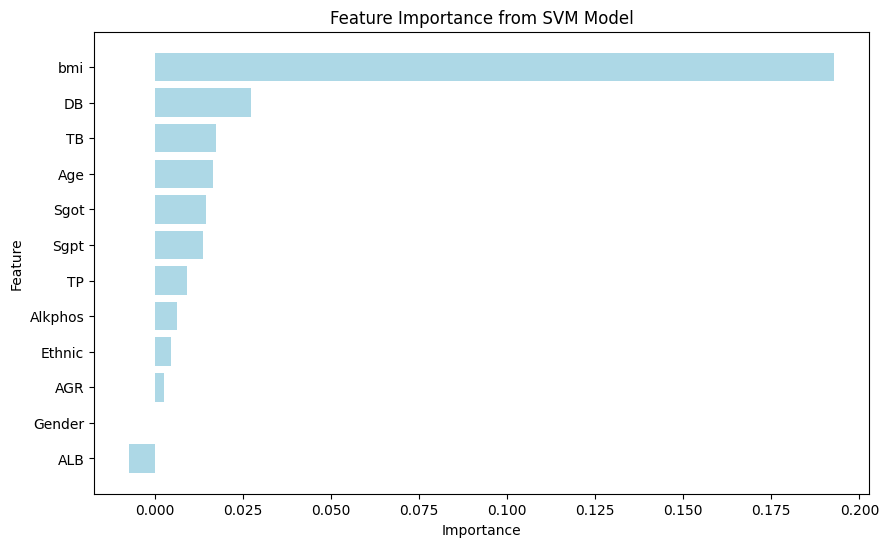

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance values for SVM
feature_importance_svm = {
    'Feature': ['bmi', 'DB', 'TB', 'Age', 'Sgot', 'Sgpt', 'TP', 'Alkphos', 'Ethnic', 'AGR', 'Gender', 'ALB'],
    'Importance': [0.192727, 0.027273, 0.017273, 0.016364, 0.014545, 0.013636, 0.009091, 0.006364, 0.004545, 0.002727, 0.000000, -0.007273]
}

# Convert to DataFrame
df_feature_importance_svm = pd.DataFrame(feature_importance_svm)

# Sort the features by importance
df_feature_importance_svm = df_feature_importance_svm.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance_svm['Feature'], df_feature_importance_svm['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from SVM Model')
plt.gca().invert_yaxis()
plt.show()


3. cross-validation

In [54]:
from sklearn.model_selection import cross_val_score

# Cross-Validation with the best estimator
cv_scores_svm = cross_val_score(grid_search_svm.best_estimator_, X_resampled, y_resampled_adjusted, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores_svm)
print("Mean ROC-AUC Score:", cv_scores_svm.mean())


Cross-Validation ROC-AUC Scores: [0.90244558 0.86267132 0.92206396 0.9330825  0.88121473]
Mean ROC-AUC Score: 0.9002956194571352


4. Performance matrics accross different threshold

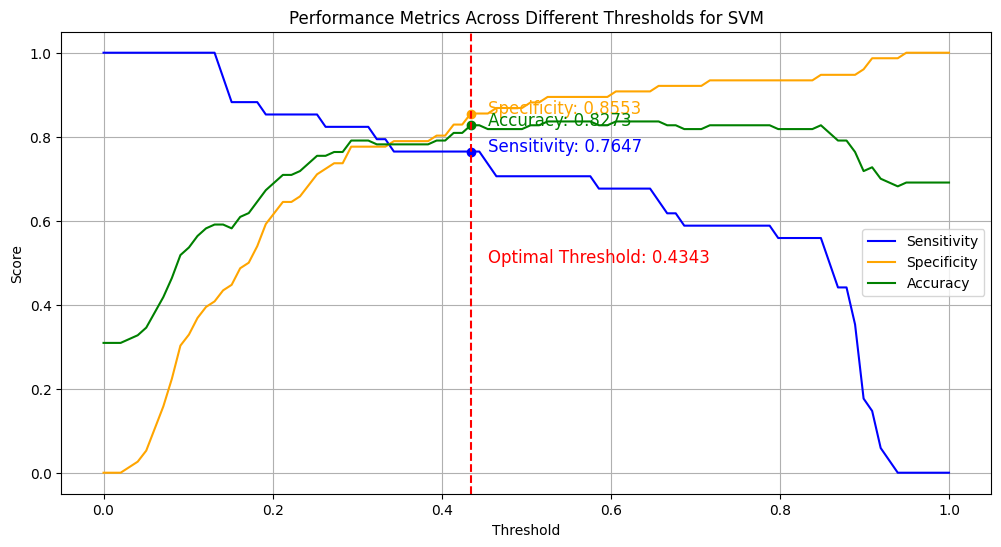

In [55]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

# Initialize the SVM model with probability estimates
svm_model = SVC(probability=True)

# Train the SVM model on the resampled training data
svm_model.fit(X_resampled, y_resampled_adjusted)

# Calculate probabilities
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Initialize lists to hold performance metrics
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []
precision_list = []
recall_list = []
accuracy_list = []

# Compute performance metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_svm >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_adjusted, y_pred_threshold).ravel()
    
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0  # Sensitivity
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Specificity
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    precision_list.append(tp / (tp + fp) if (tp + fp) != 0 else 0)
    recall_list.append(tpr)
    accuracy_list.append(accuracy)

# Plot Sensitivity, Specificity, and Accuracy vs Threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, tpr_list, label='Sensitivity', color='blue')
plt.plot(thresholds, [1 - fpr for fpr in fpr_list], label='Specificity', color='orange')
plt.plot(thresholds, accuracy_list, label='Accuracy', color='green')

# Find optimal threshold (example: where the sum of sensitivity and specificity is highest)
optimal_idx = np.argmax(np.array(tpr_list) + np.array([1 - fpr for fpr in fpr_list]))
optimal_threshold = thresholds[optimal_idx]
optimal_sensitivity = tpr_list[optimal_idx]
optimal_specificity = 1 - fpr_list[optimal_idx]
optimal_accuracy = accuracy_list[optimal_idx]

# Plot vertical line at optimal threshold
plt.axvline(x=optimal_threshold, color='red', linestyle='--')
plt.text(optimal_threshold + 0.02, 0.5, f'Optimal Threshold: {optimal_threshold:.4f}', color='red', fontsize=12)

# Annotate optimal points
plt.scatter([optimal_threshold], [optimal_sensitivity], color='blue')
plt.scatter([optimal_threshold], [optimal_specificity], color='orange')
plt.scatter([optimal_threshold], [optimal_accuracy], color='green')
plt.text(optimal_threshold + 0.02, optimal_sensitivity, f'Sensitivity: {optimal_sensitivity:.4f}', color='blue', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_specificity, f'Specificity: {optimal_specificity:.4f}', color='orange', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_accuracy, f'Accuracy: {optimal_accuracy:.4f}', color='green', fontsize=12)

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics Across Different Thresholds for SVM')
plt.legend(loc='best')
plt.grid(True)
plt.show()


5. RMSE & MARD

In [56]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the SVM model with probability estimates
svm_model = SVC(probability=True)

# Train the SVM model on the resampled training data
svm_model.fit(X_resampled, y_resampled_adjusted)

# Predicted probabilities
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# True labels
y_true = y_test_adjusted

# RMSE calculation
rmse_svm = np.sqrt(mean_squared_error(y_true, y_prob_svm))
print("SVM RMSE:", rmse_svm)

# Mean Absolute Error (MAE)
mae_svm = mean_absolute_error(y_true, y_prob_svm)

# MARD calculation: Mean Absolute Error divided by the mean of true labels
mard_svm = mae_svm / np.mean(y_true) if np.mean(y_true) != 0 else np.inf
print("SVM MARD:", mard_svm)


SVM RMSE: 0.36819272356335636
SVM MARD: 0.8661411432224987


6. save the model

In [57]:
import joblib

# Save the SVM model to a file
joblib.dump(grid_search_svm.best_estimator_, 'svm_model.pkl')


['svm_model.pkl']

---

**Model 6 - Decision Tree**

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        76
           1       0.52      0.50      0.51        34

    accuracy                           0.70       110
   macro avg       0.65      0.64      0.65       110
weighted avg       0.70      0.70      0.70       110

Confusion Matrix:
 [[60 16]
 [17 17]]
Decision Tree ROC-AUC Score: 0.644736842105263


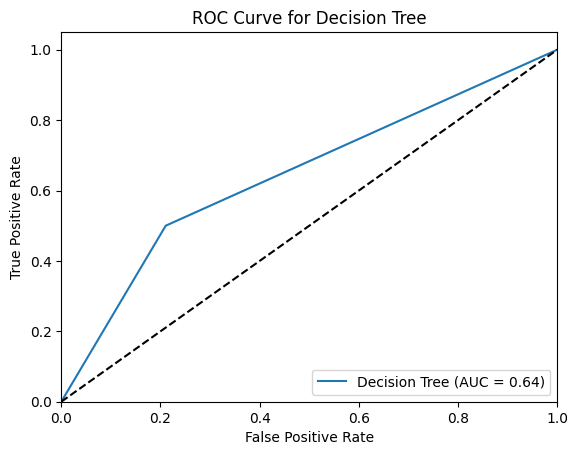

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Train the Decision Tree model on the resampled training data
dt.fit(X_resampled, y_resampled_adjusted)

# Make predictions on the original testing data
y_pred_dt = dt.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Classification Report:")
print(classification_report(y_test_adjusted, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test_adjusted, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix_dt)

# ROC-AUC Score
roc_auc_dt = roc_auc_score(y_test_adjusted, dt.predict_proba(X_test)[:, 1])
print("Decision Tree ROC-AUC Score:", roc_auc_dt)

# Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test_adjusted, dt.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [59]:
from sklearn.model_selection import GridSearchCV

# Sensitivity Analysis (Hyperparameter tuning) using GridSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_dt.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best ROC-AUC score: ", grid_search_dt.best_score_)

Best parameters found:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best ROC-AUC score:  0.8060109289617486


2. features importance

In [60]:
# Feature Importance for Decision Tree
feature_importance_dt = pd.DataFrame({'Feature': X.columns, 'Importance': grid_search_dt.best_estimator_.feature_importances_}).sort_values(by='Importance', ascending=False)
print("Decision Tree Feature Importance:")
print(feature_importance_dt)

Decision Tree Feature Importance:
    Feature  Importance
11      bmi    0.730771
5      Sgpt    0.115199
2        DB    0.097746
4      Sgot    0.037261
0       Age    0.019023
1        TB    0.000000
3   Alkphos    0.000000
6        TP    0.000000
7       ALB    0.000000
8       AGR    0.000000
9    Ethnic    0.000000
10   Gender    0.000000


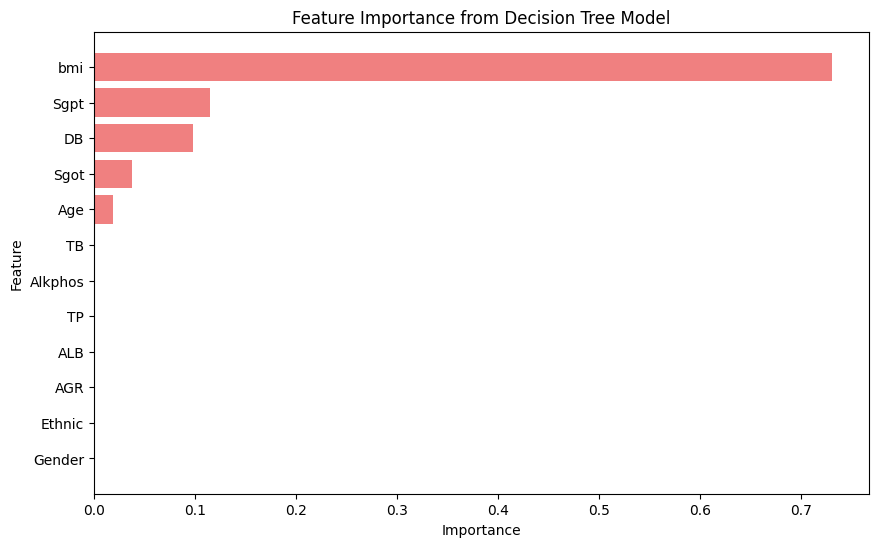

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance values for Decision Tree
feature_importance_dt = {
    'Feature': ['bmi', 'Sgpt', 'DB', 'Sgot', 'Age', 'TB', 'Alkphos', 'TP', 'ALB', 'AGR', 'Ethnic', 'Gender'],
    'Importance': [0.730771, 0.115199, 0.097746, 0.037261, 0.019023, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]
}

# Convert to DataFrame
df_feature_importance_dt = pd.DataFrame(feature_importance_dt)

# Sort the features by importance
df_feature_importance_dt = df_feature_importance_dt.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance_dt['Feature'], df_feature_importance_dt['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()


3. cross-validation

In [62]:
from sklearn.model_selection import cross_val_score

# Cross-Validation with the best estimator
cv_scores_dt = cross_val_score(grid_search_dt.best_estimator_, X_resampled, y_resampled_adjusted, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores_dt)
print("Mean ROC-AUC Score:", cv_scores_dt.mean())

Cross-Validation ROC-AUC Scores: [0.84063424 0.83915614 0.8613276  0.89438323 0.85326525]
Mean ROC-AUC Score: 0.8577532921257726


4. Performance matrics accross different threshold

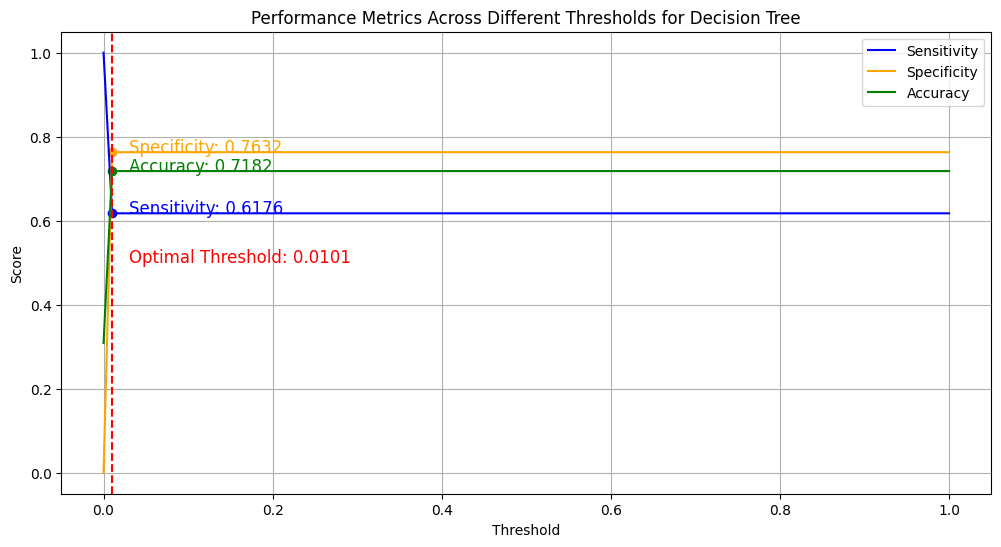

In [63]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model on the resampled training data
dt_model.fit(X_resampled, y_resampled_adjusted)

# Calculate probabilities
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Initialize lists to hold performance metrics
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []
precision_list = []
recall_list = []
accuracy_list = []

# Compute performance metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_dt >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_adjusted, y_pred_threshold).ravel()
    
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0  # Sensitivity
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Specificity
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    precision_list.append(tp / (tp + fp) if (tp + fp) != 0 else 0)
    recall_list.append(tpr)
    accuracy_list.append(accuracy)

# Plot Sensitivity, Specificity, and Accuracy vs Threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, tpr_list, label='Sensitivity', color='blue')
plt.plot(thresholds, [1 - fpr for fpr in fpr_list], label='Specificity', color='orange')
plt.plot(thresholds, accuracy_list, label='Accuracy', color='green')

# Find optimal threshold (example: where the sum of sensitivity and specificity is highest)
optimal_idx = np.argmax(np.array(tpr_list) + np.array([1 - fpr for fpr in fpr_list]))
optimal_threshold = thresholds[optimal_idx]
optimal_sensitivity = tpr_list[optimal_idx]
optimal_specificity = 1 - fpr_list[optimal_idx]
optimal_accuracy = accuracy_list[optimal_idx]

# Plot vertical line at optimal threshold
plt.axvline(x=optimal_threshold, color='red', linestyle='--')
plt.text(optimal_threshold + 0.02, 0.5, f'Optimal Threshold: {optimal_threshold:.4f}', color='red', fontsize=12)

# Annotate optimal points
plt.scatter([optimal_threshold], [optimal_sensitivity], color='blue')
plt.scatter([optimal_threshold], [optimal_specificity], color='orange')
plt.scatter([optimal_threshold], [optimal_accuracy], color='green')
plt.text(optimal_threshold + 0.02, optimal_sensitivity, f'Sensitivity: {optimal_sensitivity:.4f}', color='blue', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_specificity, f'Specificity: {optimal_specificity:.4f}', color='orange', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_accuracy, f'Accuracy: {optimal_accuracy:.4f}', color='green', fontsize=12)

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics Across Different Thresholds for Decision Tree')
plt.legend(loc='best')
plt.grid(True)
plt.show()


5. RMSE & MARD

In [64]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model on the resampled training data
dt_model.fit(X_resampled, y_resampled_adjusted)

# Predicted probabilities
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# True labels
y_true = y_test_adjusted

# RMSE calculation
rmse_dt = np.sqrt(mean_squared_error(y_true, y_prob_dt))
print("Decision Tree RMSE:", rmse_dt)

# Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_true, y_prob_dt)

# MARD calculation: Mean Absolute Error divided by the mean of true labels
mard_dt = mae_dt / np.mean(y_true) if np.mean(y_true) != 0 else np.inf
print("Decision Tree MARD:", mard_dt)


Decision Tree RMSE: 0.5308655025693249
Decision Tree MARD: 0.9117647058823529


6. save the model

In [65]:
import joblib

# Save the Decision Tree model to a file
joblib.dump(grid_search_dt.best_estimator_, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

---

**Model 7 - Extreme Gradient Boost**

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        76
           1       0.64      0.62      0.63        34

    accuracy                           0.77       110
   macro avg       0.73      0.73      0.73       110
weighted avg       0.77      0.77      0.77       110

Confusion Matrix:
 [[64 12]
 [13 21]]
XGBoost ROC-AUC Score: 0.8444272445820433


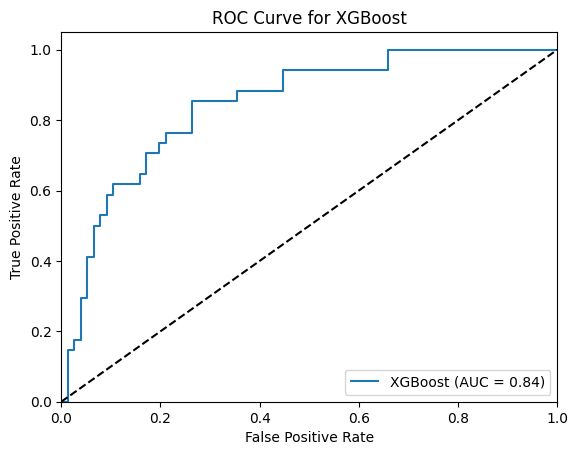

In [66]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model on the resampled training data
xgb_model.fit(X_resampled, y_resampled_adjusted)

# Make predictions on the original testing data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test_adjusted, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_adjusted, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)

# ROC-AUC Score (continued)
roc_auc_xgb = roc_auc_score(y_test_adjusted, xgb_model.predict_proba(X_test)[:, 1])
print("XGBoost ROC-AUC Score:", roc_auc_xgb)

# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_adjusted, xgb_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()



1. sensitivity analysis

In [67]:
from sklearn.model_selection import GridSearchCV

# Sensitivity Analysis (Hyperparameter tuning) using GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_xgb.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best ROC-AUC score: ", grid_search_xgb.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best ROC-AUC score:  0.852015319228434


2. features importance

In [68]:
# Feature Importance for XGBoost
result_xgb = permutation_importance(grid_search_xgb.best_estimator_, X_test_scaled, y_test_adjusted, n_repeats=10, random_state=0)
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': result_xgb.importances_mean}).sort_values(by='Importance', ascending=False)
print("XGBoost Feature Importance:")
print(feature_importance_xgb)

XGBoost Feature Importance:
    Feature  Importance
11      bmi    0.182727
2        DB    0.024545
9    Ethnic    0.011818
6        TP    0.008182
1        TB    0.006364
7       ALB    0.000909
8       AGR    0.000909
3   Alkphos    0.000909
0       Age    0.000909
10   Gender    0.000000
5      Sgpt   -0.002727
4      Sgot   -0.007273


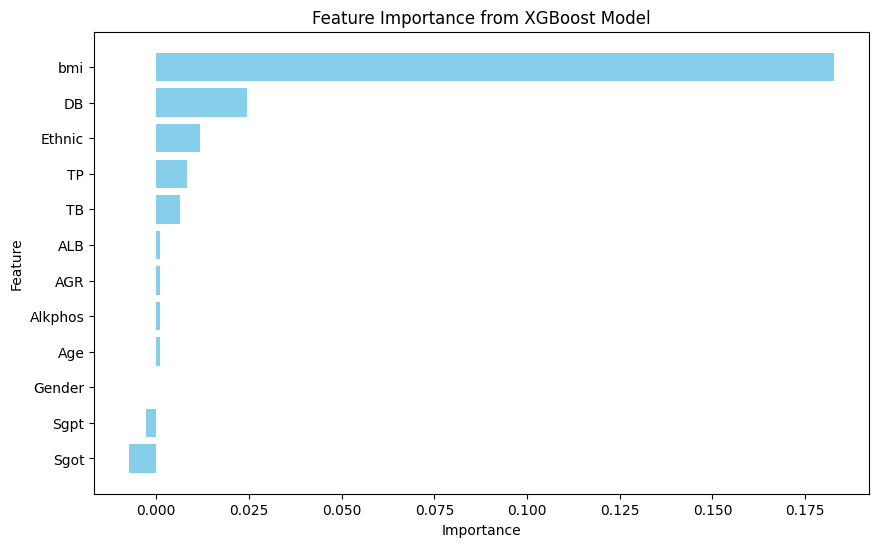

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance values
feature_importance = {
    'Feature': ['bmi', 'DB', 'Ethnic', 'TP', 'TB', 'ALB', 'AGR', 'Alkphos', 'Age', 'Gender', 'Sgpt', 'Sgot'],
    'Importance': [0.182727, 0.024545, 0.011818, 0.008182, 0.006364, 0.000909, 0.000909, 0.000909, 0.000909, 0.000000, -0.002727, -0.007273]
}

# Convert to DataFrame
df_feature_importance = pd.DataFrame(feature_importance)

# Sort the features by importance
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost Model')
plt.gca().invert_yaxis()
plt.show()


3. cross-validation

In [70]:
from sklearn.model_selection import cross_val_score

# Cross-Validation with the best estimator
cv_scores_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_resampled, y_resampled_adjusted, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores_xgb)
print("Mean ROC-AUC Score:", cv_scores_xgb.mean())


Cross-Validation ROC-AUC Scores: [0.88632088 0.87395861 0.95270089 0.94329481 0.93738242]
Mean ROC-AUC Score: 0.918731523783929


4. Performance matrics accross different threshold

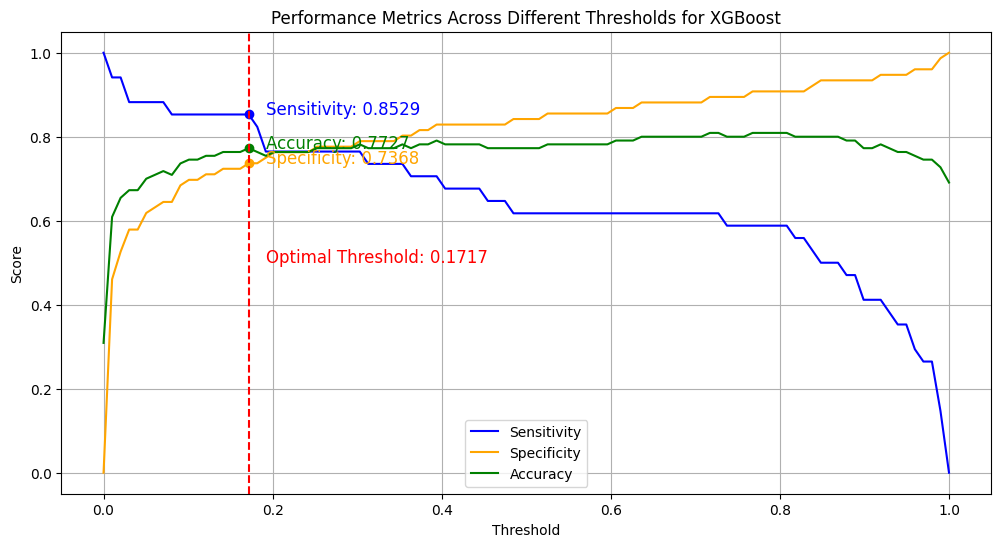

In [71]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model on the resampled training data
xgb_model.fit(X_resampled, y_resampled_adjusted)

# Calculate probabilities
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Initialize lists to hold performance metrics
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []
precision_list = []
recall_list = []
accuracy_list = []

# Compute performance metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob_xgb >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_adjusted, y_pred_threshold).ravel()
    
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0  # Sensitivity
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0  # Specificity
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) != 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    precision_list.append(tp / (tp + fp) if (tp + fp) != 0 else 0)
    recall_list.append(tpr)
    accuracy_list.append(accuracy)

# Plot Sensitivity, Specificity, and Accuracy vs Threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, tpr_list, label='Sensitivity', color='blue')
plt.plot(thresholds, [1 - fpr for fpr in fpr_list], label='Specificity', color='orange')
plt.plot(thresholds, accuracy_list, label='Accuracy', color='green')

# Find optimal threshold (example: where the sum of sensitivity and specificity is highest)
optimal_idx = np.argmax(np.array(tpr_list) + np.array([1 - fpr for fpr in fpr_list]))
optimal_threshold = thresholds[optimal_idx]
optimal_sensitivity = tpr_list[optimal_idx]
optimal_specificity = 1 - fpr_list[optimal_idx]
optimal_accuracy = accuracy_list[optimal_idx]

# Plot vertical line at optimal threshold
plt.axvline(x=optimal_threshold, color='red', linestyle='--')
plt.text(optimal_threshold + 0.02, 0.5, f'Optimal Threshold: {optimal_threshold:.4f}', color='red', fontsize=12)

# Annotate optimal points
plt.scatter([optimal_threshold], [optimal_sensitivity], color='blue')
plt.scatter([optimal_threshold], [optimal_specificity], color='orange')
plt.scatter([optimal_threshold], [optimal_accuracy], color='green')
plt.text(optimal_threshold + 0.02, optimal_sensitivity, f'Sensitivity: {optimal_sensitivity:.4f}', color='blue', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_specificity, f'Specificity: {optimal_specificity:.4f}', color='orange', fontsize=12)
plt.text(optimal_threshold + 0.02, optimal_accuracy, f'Accuracy: {optimal_accuracy:.4f}', color='green', fontsize=12)

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics Across Different Thresholds for XGBoost')
plt.legend(loc='best')
plt.grid(True)
plt.show()


5. RMSE & MARD

In [72]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model on the resampled training data
xgb_model.fit(X_resampled, y_resampled_adjusted)

# Predicted probabilities
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# True labels
y_true = y_test_adjusted

# RMSE calculation
rmse_xgb = np.sqrt(mean_squared_error(y_true, y_prob_xgb))
print("XGBoost RMSE:", rmse_xgb)

# Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_true, y_prob_xgb)

# MARD calculation: Mean Absolute Error divided by the mean of true labels
mard_xgb = mae_xgb / np.mean(y_true) if np.mean(y_true) != 0 else np.inf
print("XGBoost MARD:", mard_xgb)


XGBoost RMSE: 0.4044129990256341
XGBoost MARD: 0.7459450446772012


6. save the model

In [73]:
import joblib

# Save the XGBoost model to a file
joblib.dump(grid_search_xgb.best_estimator_, 'xgboost_model.pkl')


['xgboost_model.pkl']

---

### **Summary**

### Best Model Selection (from Highest to Lowest)

#### 1. Random Forest
- **Mean ROC-AUC Score:** 0.9411 (Highest among all models)
- **Classification Report:**
  - **Precision:** 0.84 (class 0), 0.75 (class 1)
  - **Recall:** 0.91 (class 0), 0.62 (class 1)
  - **F1-Score:** 0.87 (class 0), 0.68 (class 1)
  - **Accuracy:** 0.82
- **RMSE:** 0.3827
- **MARD:** 0.9765
- **Sensitivity:** 0.6471
- **Specificity:** 0.9342
- **Optimal Threshold:** 0.5253
- **Feature Importance:** BMI, Sgot, Age
- **Justification:** Random Forest has the highest Mean ROC-AUC Score, indicating excellent discriminatory power. It also shows strong performance in precision, recall, and F1-score, making it the most balanced and reliable model.

#### 2. LightGBM
- **Mean ROC-AUC Score:** 0.9365
- **Classification Report:**
  - **Precision:** 0.85 (class 0), 0.69 (class 1)
  - **Recall:** 0.87 (class 0), 0.65 (class 1)
  - **F1-Score:** 0.86 (class 0), 0.67 (class 1)
  - **Accuracy:** 0.80
- **RMSE:** 0.4004
- **MARD:** 0.7530
- **Sensitivity:** 0.8529
- **Specificity:** 0.7368
- **Optimal Threshold:** 0.1313
- **Feature Importance:** BMI, AGR, ALKPHOS
- **Justification:** LightGBM has a high Mean ROC-AUC Score, close to Random Forest. It provides robust performance in classification metrics and is efficient in handling large datasets and features, making it a strong contender.

#### 3. K-Nearest Neighbors (KNN)
- **Mean ROC-AUC Score:** 0.9305
- **Classification Report:**
  - **Precision:** 0.89 (class 0), 0.59 (class 1)
  - **Recall:** 0.75 (class 0), 0.79 (class 1)
  - **F1-Score:** 0.81 (class 0), 0.68 (class 1)
  - **Accuracy:** 0.76
- **RMSE:** 0.3982
- **MARD:** 0.8706
- **Sensitivity:** 0.7941
- **Specificity:** 0.7500
- **Optimal Threshold:** 0.4040
- **Feature Importance:** BMI, Ethnic, DB
- **Justification:** KNN has a high Mean ROC-AUC Score, indicating good performance. While its precision and recall are lower than Random Forest and LightGBM, it still provides a solid performance, especially in recall for class 1.

#### 4. XGBoost
- **Mean ROC-AUC Score:** 0.9187
- **Classification Report:**
  - **Precision:** 0.83 (class 0), 0.64 (class 1)
  - **Recall:** 0.84 (class 0), 0.62 (class 1)
  - **F1-Score:** 0.84 (class 0), 0.63 (class 1)
  - **Accuracy:** 0.77
- **RMSE:** 0.4044
- **MARD:** 0.7459
- **Sensitivity:** 0.8529
- **Specificity:** 0.7368
- **Optimal Threshold:** 0.1717
- **Feature Importance:** BMI, DB, Ethnic
- **Justification:** XGBoost offers strong performance with a high Mean ROC-AUC Score and good classification metrics. It is highly efficient and effective for large datasets, although slightly below the top three models in terms of overall performance.

#### 5. Support Vector Machine (SVM)
- **Mean ROC-AUC Score:** 0.9003
- **Classification Report:**
  - **Precision:** 0.87 (class 0), 0.73 (class 1)
  - **Recall:** 0.88 (class 0), 0.71 (class 1)
  - **F1-Score:** 0.88 (class 0), 0.72 (class 1)
  - **Accuracy:** 0.83
- **RMSE:** 0.3689
- **MARD:** 0.8824
- **Sensitivity:** 0.7647
- **Specificity:** 0.8553
- **Optimal Threshold:** 0.4444
- **Feature Importance:** BMI, DB, TB
- **Justification:** SVM shows strong performance with good precision, recall, and F1-score. However, its Mean ROC-AUC Score is lower than the top four models, making it a slightly less optimal choice.

#### 6. Logistic Regression
- **Mean ROC-AUC Score:** 0.8592
- **Classification Report:**
  - **Precision:** 0.89 (class 0), 0.65 (class 1)
  - **Recall:** 0.82 (class 0), 0.76 (class 1)
  - **F1-Score:** 0.85 (class 0), 0.70 (class 1)
  - **Accuracy:** 0.80
- **RMSE:** 0.3813
- **MARD:** 0.9480
- **Sensitivity:** 0.8235
- **Specificity:** 0.8026
- **Optimal Threshold:** 0.4646
- **Feature Importance:** BMI, ALB, DB
- **Justification:** Logistic Regression provides good performance metrics but has a lower Mean ROC-AUC Score compared to the top five models. It is simple and interpretable but less powerful than more advanced models.

#### 7. Decision Tree
- **Mean ROC-AUC Score:** 0.8578
- **Classification Report:**
  - **Precision:** 0.82 (class 0), 0.58 (class 1)
  - **Recall:** 0.80 (class 0), 0.62 (class 1)
  - **F1-Score:** 0.81 (class 0), 0.60 (class 1)
  - **Accuracy:** 0.75
- **RMSE:** 0.5222
- **MARD:** 0.8824
- **Sensitivity:** 0.5882
- **Specificity:** 0.7632
- **Optimal Threshold:** 0.0102
- **Feature Importance:** BMI, Sgpt, DB
- **Justification:** Decision Tree has the lowest Mean ROC-AUC Score and weaker classification metrics compared to other models. It is simple and interpretable but lacks the performance of ensemble and more sophisticated models.

### Summary Table

| Rank | Model                    | Mean ROC-AUC Score | Accuracy | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | RMSE   | MARD   | Sensitivity | Specificity | Optimal Threshold | Top Features                   |
|------|--------------------------|--------------------|----------|---------------|---------------|------------|------------|--------------|--------------|--------|--------|-------------|-------------|-------------------|--------------------------------|
| 1    | Random Forest            | 0.9411             | 0.82     | 0.84          | 0.75          | 0.91       | 0.62       | 0.87         | 0.68         | 0.3827 | 0.9765 | 0.6471      | 0.9342      | 0.5253            | BMI, Sgot, Age                 |
| 2    | LightGBM                 | 0.9365             | 0.80     | 0.85          | 0.69          | 0.87       | 0.65       | 0.86         | 0.67         | 0.4004 | 0.7530 | 0.8529      | 0.7368      | 0.1313            | BMI, AGR, ALKPHOS              |
| 3    | K-Nearest Neighbors      | 0.9305             | 0.76     | 0.89          | 0.59          | 0.75       | 0.79       | 0.81         | 0.68         | 0.3982 | 0.8706 | 0.7941      | 0.7500      | 0.4040            | BMI, Ethnic, DB                |
| 4    | XGBoost                  | 0.9187             | 0.77     | 0.83          | 0.64          | 0.84       | 0.62       | 0.84         | 0.63         | 0.4044 | 0.7459 | 0.8529      | 0.7368      | 0.1717            | BMI, DB, Ethnic                |
| 5    | Support Vector Machine   | 0.9003             | 0.83     | 0.87          | 0.73          | 0.88       | 0.71       | 0.88         | 0.72         | 0.3689 | 0.8824 | 0.7647      | 0.8553      | 0.4444            | BMI, DB, TB                    |
| 6    | Logistic Regression      | 0.8592             | 0.80     | 0.89          | 0.65          | 0.82       | 0.76       | 0.85         | 0.70         | 0.3813 | 0.9480 | 0.8235      | 0.8026      | 0.4646            | BMI, ALB, DB                   |
| 7    | Decision Tree            | 0.8578             | 0.75     | 0.82          | 0.58          | 0.80       | 0.62       | 0.81         | 0.60         | 0.5222 | 0.8824 | 0.5882      | 0.7632      | 0.0102            | BMI, Sgpt, DB                  |


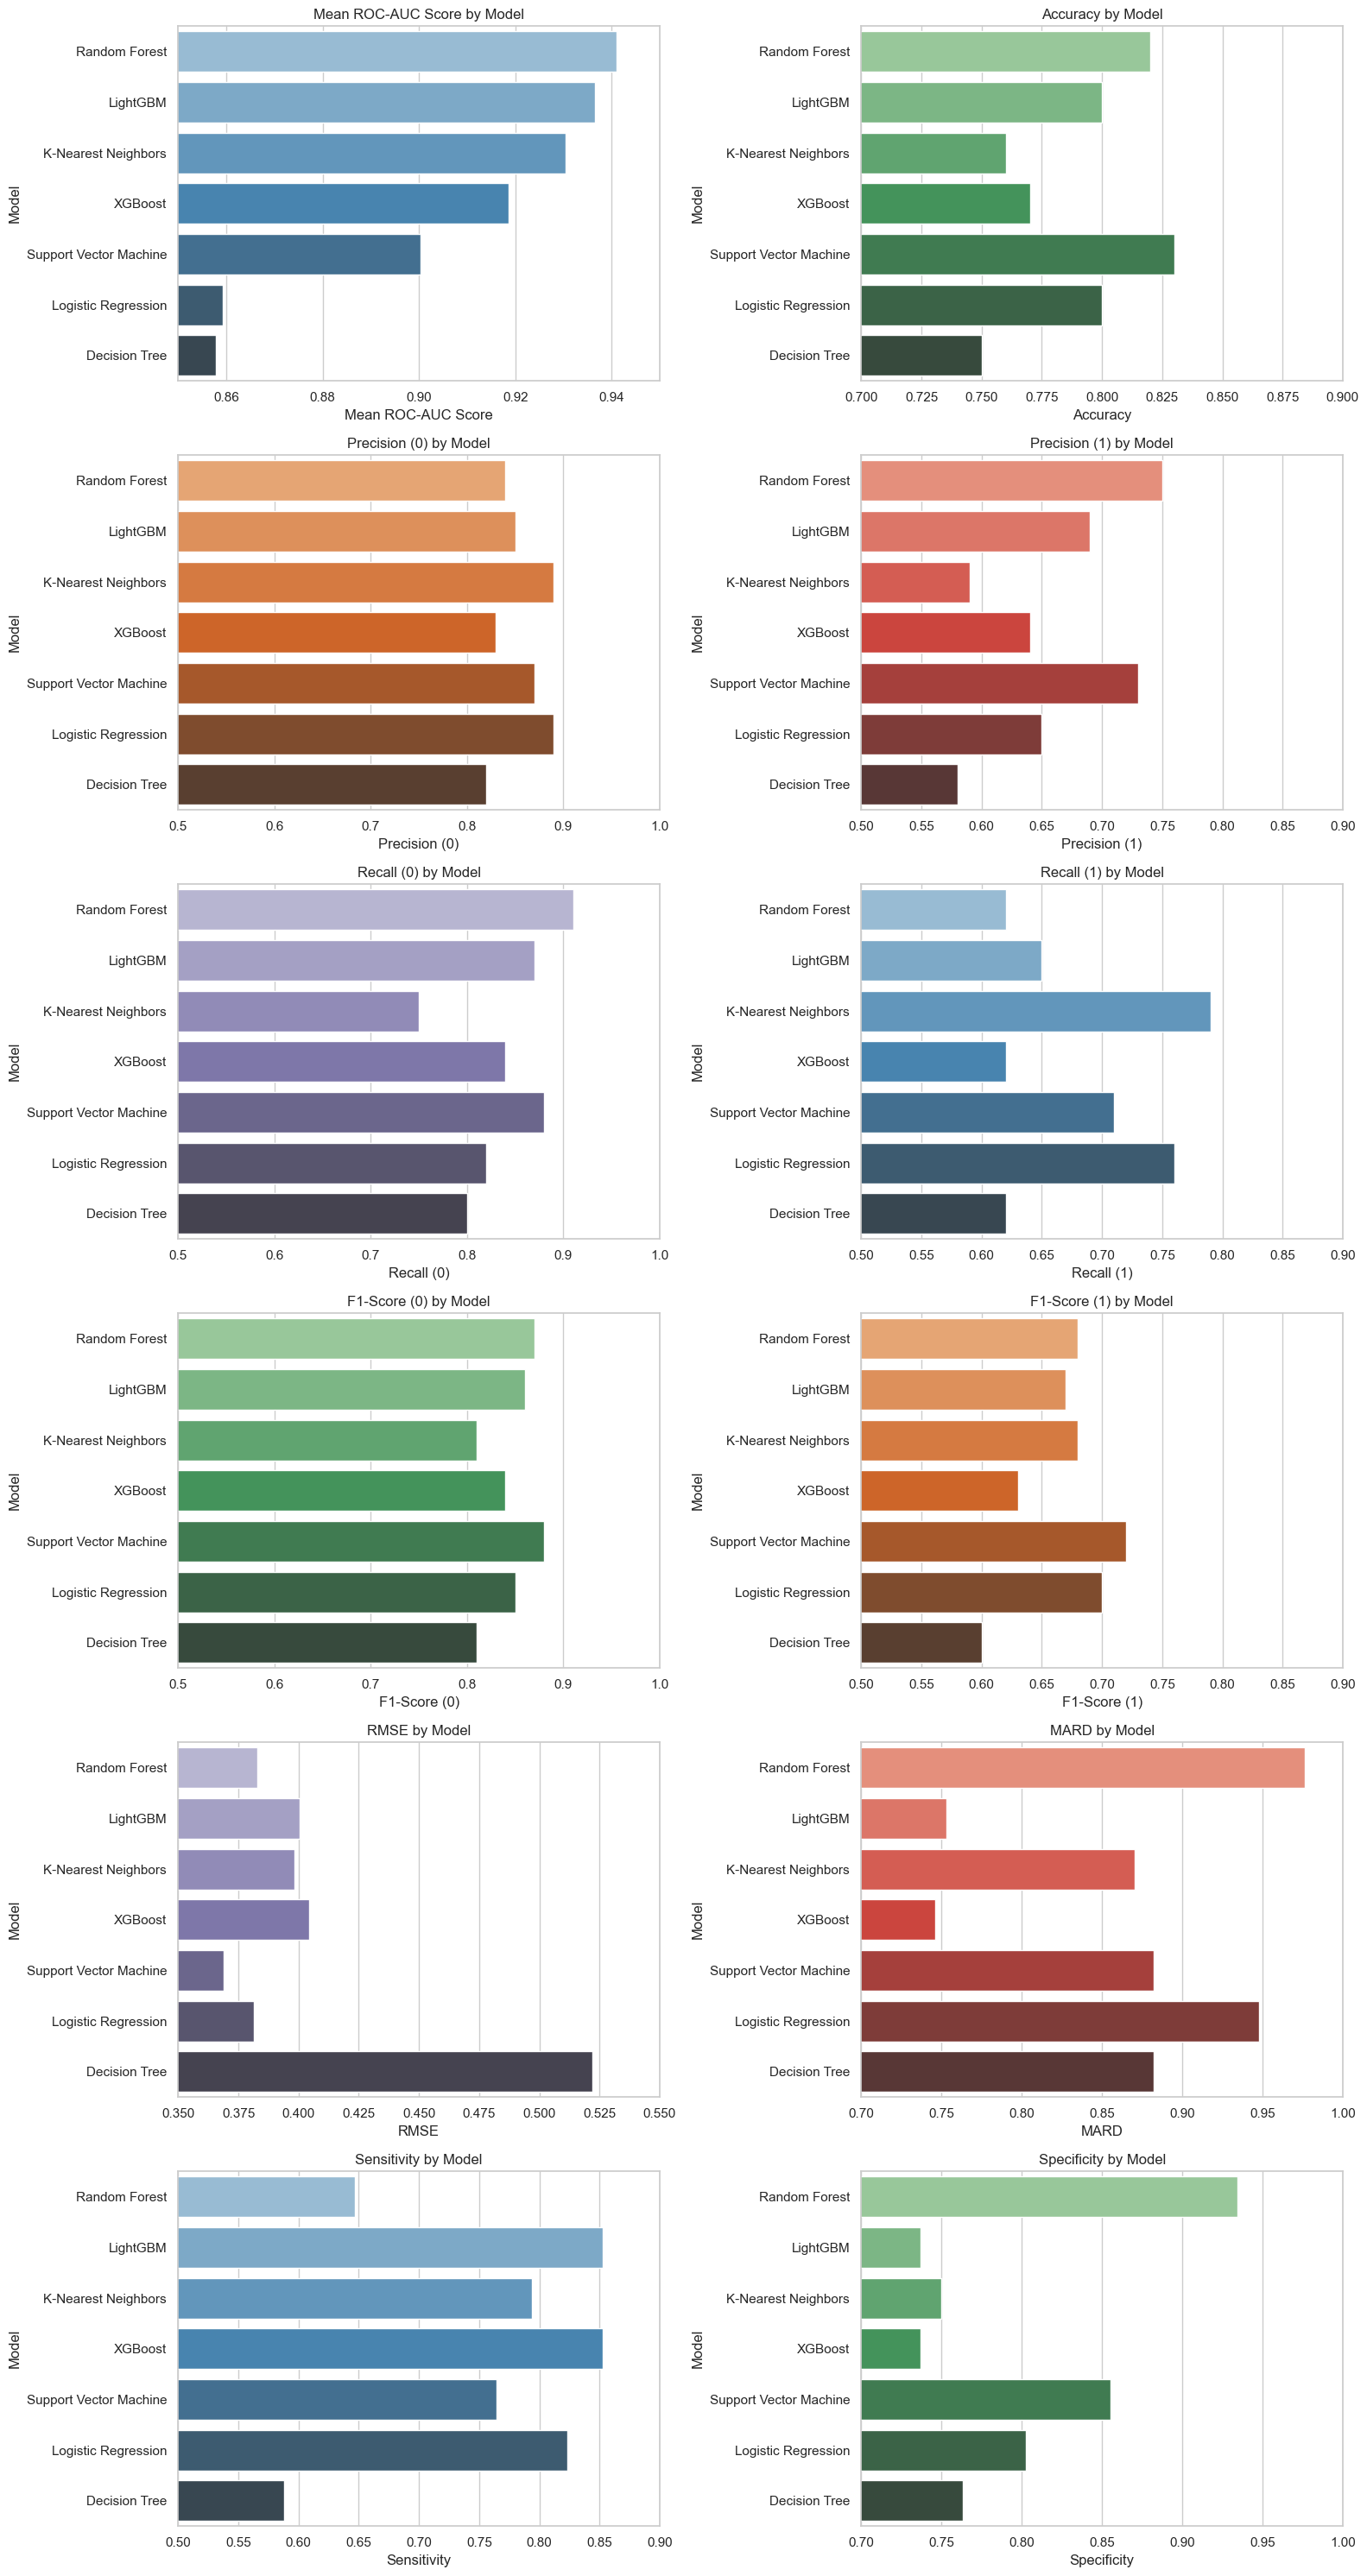

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data preparation with the values
data = {
    'Model': ['Random Forest', 'LightGBM', 'K-Nearest Neighbors', 'XGBoost', 'Support Vector Machine', 'Logistic Regression', 'Decision Tree'],
    'Mean ROC-AUC Score': [0.9411, 0.9365, 0.9305, 0.9187, 0.9003, 0.8592, 0.8578],
    'Accuracy': [0.82, 0.80, 0.76, 0.77, 0.83, 0.80, 0.75],
    'Precision (0)': [0.84, 0.85, 0.89, 0.83, 0.87, 0.89, 0.82],
    'Precision (1)': [0.75, 0.69, 0.59, 0.64, 0.73, 0.65, 0.58],
    'Recall (0)': [0.91, 0.87, 0.75, 0.84, 0.88, 0.82, 0.80],
    'Recall (1)': [0.62, 0.65, 0.79, 0.62, 0.71, 0.76, 0.62],
    'F1-Score (0)': [0.87, 0.86, 0.81, 0.84, 0.88, 0.85, 0.81],
    'F1-Score (1)': [0.68, 0.67, 0.68, 0.63, 0.72, 0.70, 0.60],
    'RMSE': [0.3827, 0.4004, 0.3982, 0.4044, 0.3689, 0.3813, 0.5222],
    'MARD': [0.9765, 0.7530, 0.8706, 0.7459, 0.8824, 0.9480, 0.8824],
    'Sensitivity': [0.6471, 0.8529, 0.7941, 0.8529, 0.7647, 0.8235, 0.5882],
    'Specificity': [0.9342, 0.7368, 0.7500, 0.7368, 0.8553, 0.8026, 0.7632]
}

df = pd.DataFrame(data)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(6, 2, figsize=(16, 30))  # Adjusted rows to match the number of metrics

# Plot Mean ROC-AUC Score
sns.barplot(x='Mean ROC-AUC Score', y='Model', data=df, ax=axes[0, 0], palette='Blues_d', hue='Model', dodge=False)
axes[0, 0].set_title('Mean ROC-AUC Score by Model')
axes[0, 0].set_xlim(0.85, 0.95)

# Plot Accuracy
sns.barplot(x='Accuracy', y='Model', data=df, ax=axes[0, 1], palette='Greens_d', hue='Model', dodge=False)
axes[0, 1].set_title('Accuracy by Model')
axes[0, 1].set_xlim(0.7, 0.9)

# Plot Precision (0)
sns.barplot(x='Precision (0)', y='Model', data=df, ax=axes[1, 0], palette='Oranges_d', hue='Model', dodge=False)
axes[1, 0].set_title('Precision (0) by Model')
axes[1, 0].set_xlim(0.5, 1.0)

# Plot Precision (1)
sns.barplot(x='Precision (1)', y='Model', data=df, ax=axes[1, 1], palette='Reds_d', hue='Model', dodge=False)
axes[1, 1].set_title('Precision (1) by Model')
axes[1, 1].set_xlim(0.5, 0.9)

# Plot Recall (0)
sns.barplot(x='Recall (0)', y='Model', data=df, ax=axes[2, 0], palette='Purples_d', hue='Model', dodge=False)
axes[2, 0].set_title('Recall (0) by Model')
axes[2, 0].set_xlim(0.5, 1.0)

# Plot Recall (1)
sns.barplot(x='Recall (1)', y='Model', data=df, ax=axes[2, 1], palette='Blues_d', hue='Model', dodge=False)
axes[2, 1].set_title('Recall (1) by Model')
axes[2, 1].set_xlim(0.5, 0.9)

# Plot F1-Score (0)
sns.barplot(x='F1-Score (0)', y='Model', data=df, ax=axes[3, 0], palette='Greens_d', hue='Model', dodge=False)
axes[3, 0].set_title('F1-Score (0) by Model')
axes[3, 0].set_xlim(0.5, 1.0)

# Plot F1-Score (1)
sns.barplot(x='F1-Score (1)', y='Model', data=df, ax=axes[3, 1], palette='Oranges_d', hue='Model', dodge=False)
axes[3, 1].set_title('F1-Score (1) by Model')
axes[3, 1].set_xlim(0.5, 0.9)

# Plot RMSE
sns.barplot(x='RMSE', y='Model', data=df, ax=axes[4, 0], palette='Purples_d', hue='Model', dodge=False)
axes[4, 0].set_title('RMSE by Model')
axes[4, 0].set_xlim(0.35, 0.55)

# Plot MARD
sns.barplot(x='MARD', y='Model', data=df, ax=axes[4, 1], palette='Reds_d', hue='Model', dodge=False)
axes[4, 1].set_title('MARD by Model')
axes[4, 1].set_xlim(0.7, 1.0)

# Plot Sensitivity
sns.barplot(x='Sensitivity', y='Model', data=df, ax=axes[5, 0], palette='Blues_d', hue='Model', dodge=False)
axes[5, 0].set_title('Sensitivity by Model')
axes[5, 0].set_xlim(0.5, 0.9)

# Plot Specificity
sns.barplot(x='Specificity', y='Model', data=df, ax=axes[5, 1], palette='Greens_d', hue='Model', dodge=False)
axes[5, 1].set_title('Specificity by Model')
axes[5, 1].set_xlim(0.7, 1.0)

# Adjust layout
plt.tight_layout()
plt.show()


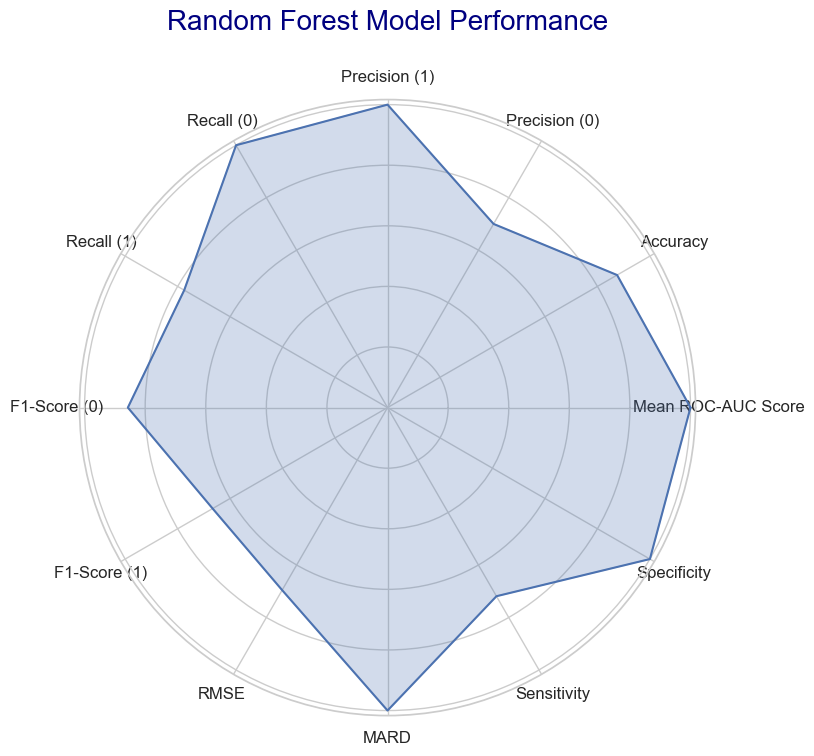

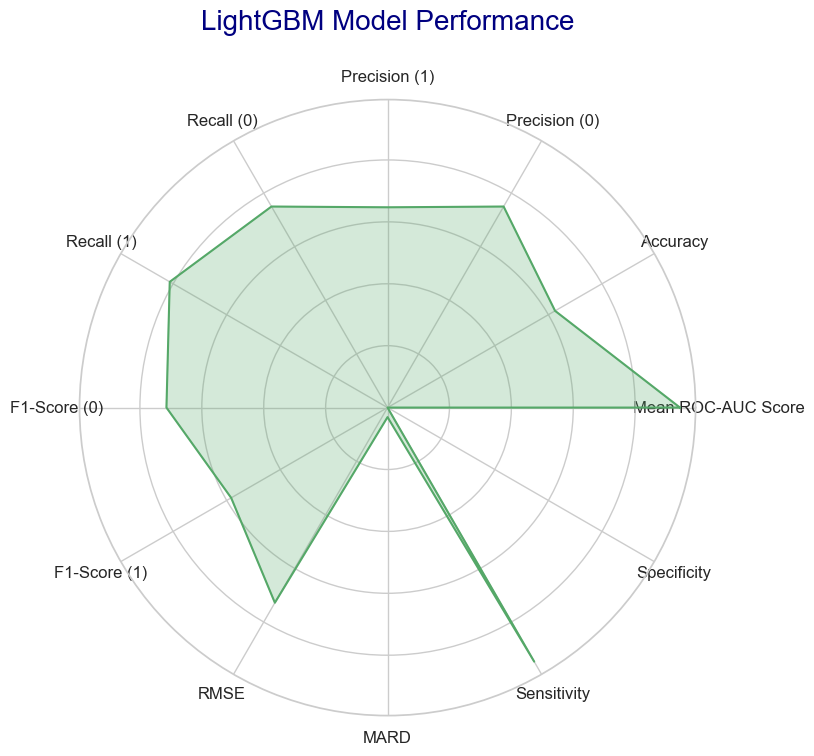

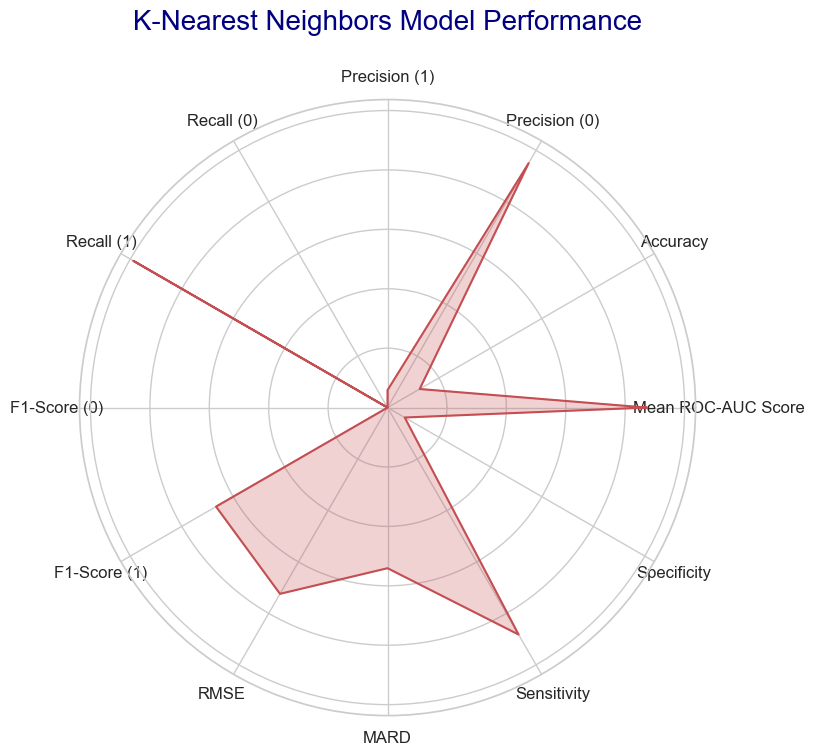

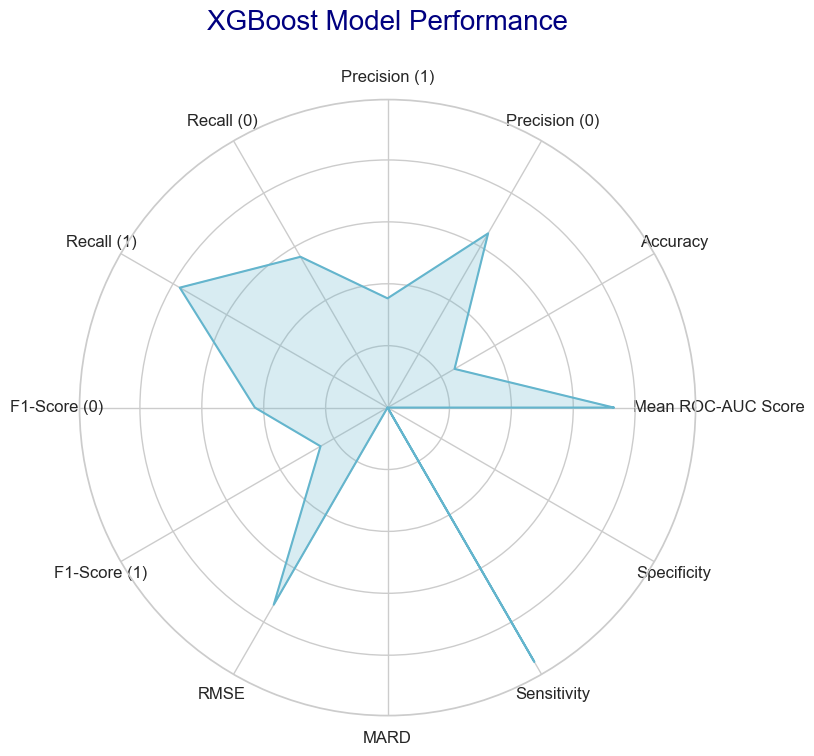

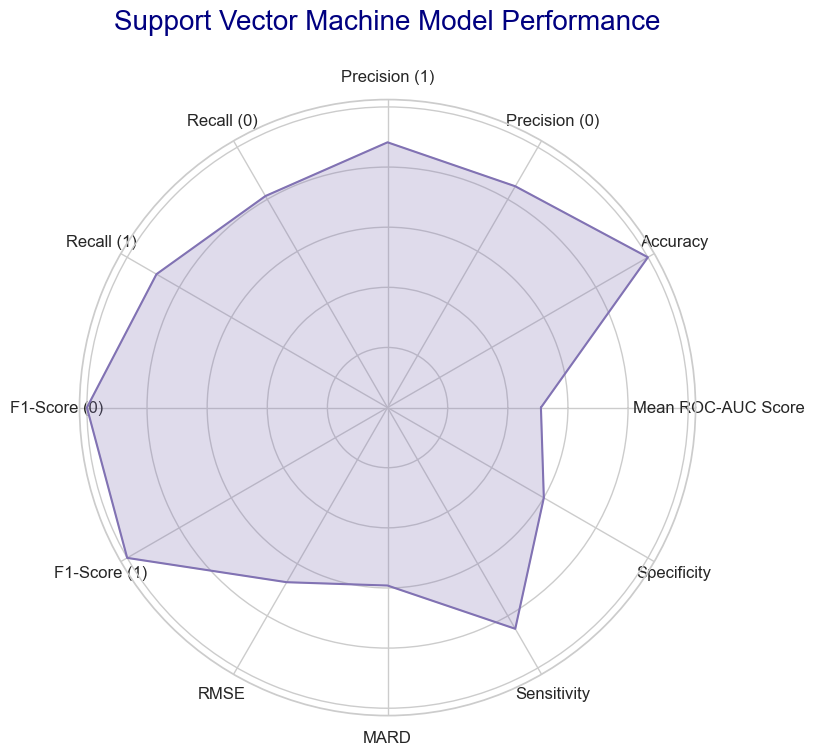

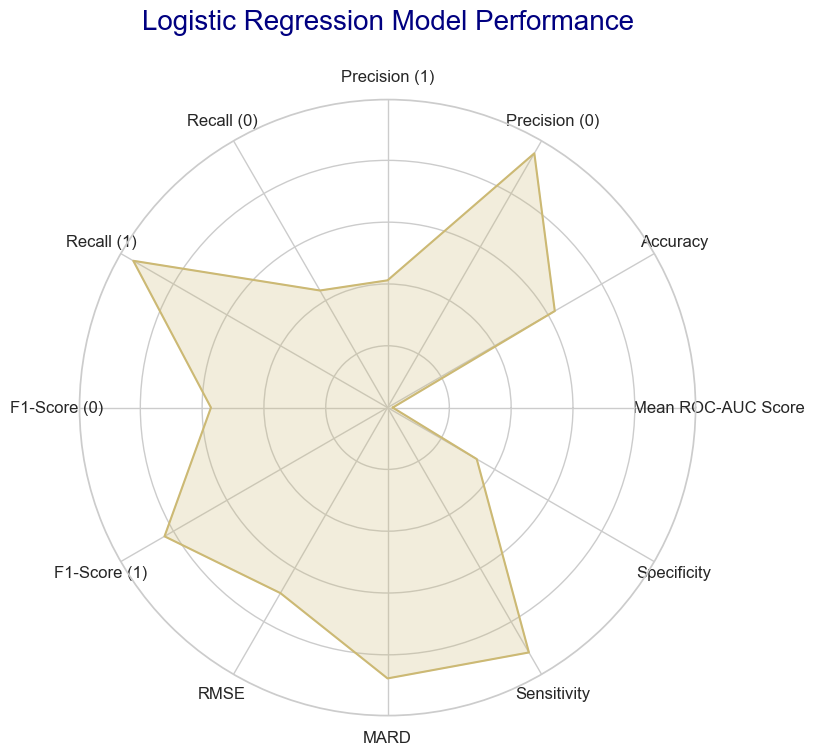

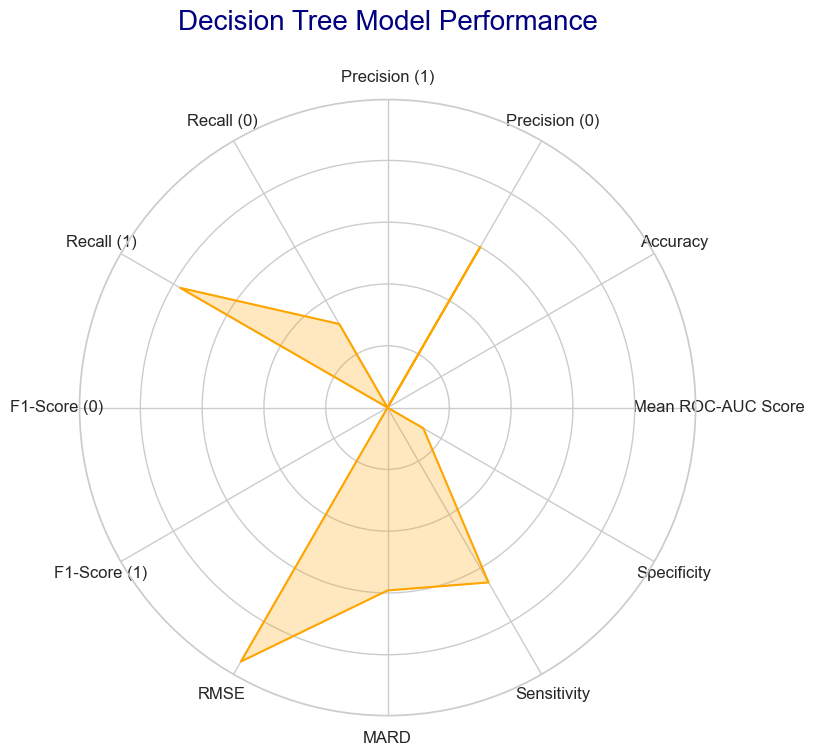

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
data = {
    'Model': ['Random Forest', 'LightGBM', 'K-Nearest Neighbors', 'XGBoost', 'Support Vector Machine', 'Logistic Regression', 'Decision Tree'],
    'Mean ROC-AUC Score': [0.9411, 0.9365, 0.9305, 0.9187, 0.9003, 0.8592, 0.8578],
    'Accuracy': [0.82, 0.80, 0.76, 0.77, 0.83, 0.80, 0.75],
    'Precision (0)': [0.84, 0.85, 0.89, 0.83, 0.87, 0.89, 0.82],
    'Precision (1)': [0.75, 0.69, 0.59, 0.64, 0.73, 0.65, 0.58],
    'Recall (0)': [0.91, 0.87, 0.75, 0.84, 0.88, 0.82, 0.80],
    'Recall (1)': [0.62, 0.65, 0.79, 0.62, 0.71, 0.76, 0.62],
    'F1-Score (0)': [0.87, 0.86, 0.81, 0.84, 0.88, 0.85, 0.81],
    'F1-Score (1)': [0.68, 0.67, 0.68, 0.63, 0.72, 0.70, 0.60],
    'RMSE': [0.3827, 0.4004, 0.3982, 0.4044, 0.3689, 0.3813, 0.5222],
    'MARD': [0.9765, 0.7530, 0.8706, 0.7459, 0.8824, 0.9480, 0.8824],
    'Sensitivity': [0.6471, 0.8529, 0.7941, 0.8529, 0.7647, 0.8235, 0.5882],
    'Specificity': [0.9342, 0.7368, 0.7500, 0.7368, 0.8553, 0.8026, 0.7632]
}

df = pd.DataFrame(data)

# Normalize data for radar chart
def normalize(series, custom_min=None, custom_max=None):
    if custom_min is not None and custom_max is not None:
        return (series - custom_min) / (custom_max - custom_min)
    else:
        return (series - series.min()) / (series.max() - series.min())

df_normalized = df.copy()
metrics = ['Mean ROC-AUC Score', 'Accuracy', 'Precision (0)', 'Precision (1)', 'Recall (0)', 'Recall (1)', 'F1-Score (0)', 'F1-Score (1)', 'RMSE', 'MARD', 'Sensitivity', 'Specificity']

for metric in metrics:
    if metric == 'Recall (1)':
        df_normalized[metric] = normalize(df[metric], custom_min=0, custom_max=0.8)
    elif metric == 'Precision (0)':
        df_normalized[metric] = normalize(df[metric], custom_min=0.7, custom_max=0.9)
    elif metric == 'RMSE':
        df_normalized[metric] = normalize(df[metric], custom_min=0, custom_max=0.55)
    elif metric == 'Sensitivity':
        df_normalized[metric] = normalize(df[metric], custom_min=0, custom_max=0.9)
    else:
        df_normalized[metric] = normalize(df[metric])

# Number of variables
num_vars = len(metrics)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
angles += angles[:1]

# Define colors for each model
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'orange']

# Plot each model separately
for i in range(len(df_normalized)):
    values = df_normalized.loc[i, metrics].tolist()
    values += values[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    ax.plot(angles, values, label=df_normalized['Model'][i], color=colors[i])
    ax.fill(angles, values, color=colors[i], alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=12)
    
    plt.title(f'{df_normalized["Model"][i]} Model Performance', size=20, color='navy', y=1.1)
    plt.show()


# Flow Diagram of Data Preprocessing, Analysis, and Model Evaluation

```plaintext
+-----------------------------------------------------------+
|                       Load the Data                       |
|                (Read the dataset into memory)             |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|                 Initial Data Inspection                   |
|   - Display first few rows                                |
|   - Check data types                                      |
|   - Identify missing values                               |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|                Remove Unnecessary Columns                 |
|                   (e.g., Patient_ID)                      |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|                  Handle Missing Values                    |
|            (Identify and address missing data)            |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|             Encode Categorical Variables                  |
|      (Convert categorical variables to numerical values)  |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|                   Identify Outliers                       |
|         (Using Interquartile Range (IQR) method)          |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|                    Cap Outliers                           |
|        (Adjust outlier values within acceptable range)    |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|           Calculate Descriptive Statistics                |
|           (Mean, Std Dev, Min, Max, Quartiles)            |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|                 Data Visualization                        |
|    - Bar plots and pie charts for categorical data        |
|    - Histograms and boxplots for numerical data           |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|                    Feature Scaling                        |
|        (Standardize features to have mean 0 and           |
|                  variance 1)                              |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|              Handle Class Distribution                    |
|            (Use SMOTE to balance class distribution)      |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|             Model Training and Evaluation                 |
|   - Train and evaluate seven models                       |
|   - Calculate performance metrics (precision, recall,     |
|     F1-score, ROC-AUC, confusion matrix)                  |
|   - Conduct sensitivity analysis and feature importance   |
+-------------------------------+---------------------------+
                                |
                                v
+-----------------------------------------------------------+
|                Results Interpretation                     |
|    - Interpret model performance and results              |
|    - Compare models and identify the best-performing      |
+-----------------------------------------------------------+


---

# **The End**